# Assignment 1, Gradient Descent

*Replace this line with your name.*

In this first assignment, we are applying python code that performs gradient descent to fit several models to the air quality data discussed in the lecture during the first week.  

## Requirements

1. Implement (or copy from lecture notes if available) the following functions:

    * `linear_model(X, W)`:
        * Given
            * `X`, an N x 1 numpy array of input samples
            * `W`, a 2 x 1 numpy array of weight values, with the first weight being the bias, or y-intercept, weight
        * Return
            * an N x 1 numpy array of the linear model's predicted outputs for each sample in `X`.
        
    * `linear_model_gradient(X, T, W)`:
        * Given
            * `X`, an N x 1 numpy array of input samples
            * `T`, an N x 1 numpy array of correct outputs for each input sample
            * `W`, a 2 x 1 numpy array of weight values, with the first weight being the bias, or y-intercept, weight
        * Return
            * an 2 x 1 numpy array of the gradient of the mean squared error function with respect to each weight.

    * `quadratic_model(X, W)`:
        * Given
            * `X`, an N x 1 numpy array of input samples
            * `W`, a 3 x 1 numpy array of weight values, ordered as the bias weight, the weight for `X`, and the weight for `X**2` 
        * Return
            * an N x 1 numpy array of the quadratic model's predicted outputs for each sample in `X`.
        
    * `quadratic_model_gradient(X, T, W)`:
        * Given
            * `X`, an N x 1 numpy array of input samples
            * `T`, an N x 1 numpy array of correct outputs for each input sample
            * `W`, a 3 x 1 numpy array of weight values, ordered as for `quadratic_model`
        * Return
            * an 3 x 1 numpy array of the gradient of the mean squared error function with respect to each weight.

    * `quartic_model(X, W)`:
        * Given
            * `X`, an N x 1 numpy array of input samples
            * `W`, a 5 x 1 numpy array of weight values, ordered as the bias weight, the weight for `X`, the weight for `X**2`, the weight for `X**3`, and the weight for `X**4`
        * Return
            * an N x 1 numpy array of the quartic model's predicted outputs for each sample in `X`.
        
    * `quartic_model_gradient(X, T, W)`:
        * Given
            * `X`, an N x 1 numpy array of input samples
            * `T`, an N x 1 numpy array of correct outputs for each input sample
            * `W`, a 5 x 1 numpy array of weight values, ordered as for `quartic_model`
        * Return
            * an 5 x 1 numpy array of the gradient of the mean squared error function with respect to each weight.


2. Download the air quality data and prepare the `X` and `T` matrices as shown in the following code cells. This is a little different than what was done in class. Plot `CO(GT)` air quality versus the hour of the day to verify you have prepared the data correctly.

3. Use the `gradient_descent_adam` function defined in the lecture notes to find the best weights for the linear model, as illustrated in lecture.  Plot the RMSE versus iterations, plot the weights versus the number of steps, and plot the air quality versus hour of the day again and superimpose the linear model on the same graph.  All of this is illustrated here using a `cubic_model`.  Once this is working, copy and paste the code cells for each model and train each model with at least five different learning rates, from 1.e-2, to 1.e-10 to find rates that result in the lowest error.  Do not change the number of iterations steps.  Include the code and results for each. Discuss in markdown cells the best learning rate values and errors you get for each model.


## Example use of required functions with very simple, toy data.

In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas

In [38]:
X = np.array([0.1, 0.4, 0.7]).reshape(-1, 1)
X

array([[0.1],
       [0.4],
       [0.7]])

In [39]:
T = np.array([2.0, 1.0, 8.0]).reshape(-1, 1)
T

array([[2.],
       [1.],
       [8.]])

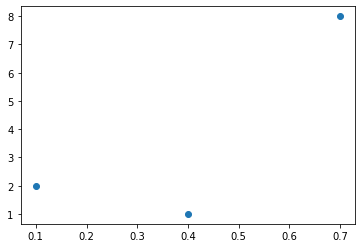

In [40]:
plt.plot(X, T, 'o');

In [41]:
def cubic_model(X, W):
    return np.hstack((X, X**2, X**3)) @ W[1:, :] + W[0, :]

def cubic_model_gradient(X, T, W):
    dEdY = -2 * (T - cubic_model(X, W))
    all_but_bias = np.hstack((X, X**2, X**3))
    dYdW = np.insert(all_but_bias, 0, 1, axis=1)
    result = dEdY.T @ dYdW / X.shape[0]
    return result.T

In [42]:
W = np.array([2.0, 1.0, -0.5, 0.3]).reshape((-1, 1))
W

array([[ 2. ],
       [ 1. ],
       [-0.5],
       [ 0.3]])

In [43]:
cubic_model(X, W)

array([[2.0953],
       [2.3392],
       [2.5579]])

In [44]:
cubic_model_gradient(X, T, W)

array([[-2.67173333],
       [-2.17617333],
       [-1.63426933],
       [-1.18722413]])

In [45]:
def gradient_descent_adam(model_f, gradient_f, rmse_f, X, T, W, rho, n_steps):
    # Commonly used parameter values
    beta1 = 0.9
    beta2 = 0.999
    epsilon = 1e-8
    m = 0
    v = 0
    
    error_sequence = []
    W_sequence = []
    
    for step in range(n_steps):
        error_sequence.append(rmse_f(model_f, X, T, W))
        W_sequence.append(W.flatten())
        
        g = gradient_f(X, T, W)
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * g * g
        mhat = m / (1 - beta1 ** (step+1))
        vhat = v / (1 - beta2 ** (step+1))
        W -= rho * mhat / (np.sqrt(vhat) + epsilon)
        
    return W, error_sequence, W_sequence

def rmse(model, X, T, W):
    Y = model(X, W)
    return np.sqrt(np.mean((T - Y)**2))

In [46]:
W = np.zeros((4, 1))
rho = 1.e-1
n_steps = 3000
W, error_sequence, W_sequence = gradient_descent_adam(cubic_model, cubic_model_gradient, rmse, X, T, W, rho, n_steps)
print(f'Final RMSE for rho {rho} at step {n_steps} is {error_sequence[-1]:4f}')

Final RMSE for rho 0.1 at step 3000 is 0.000103


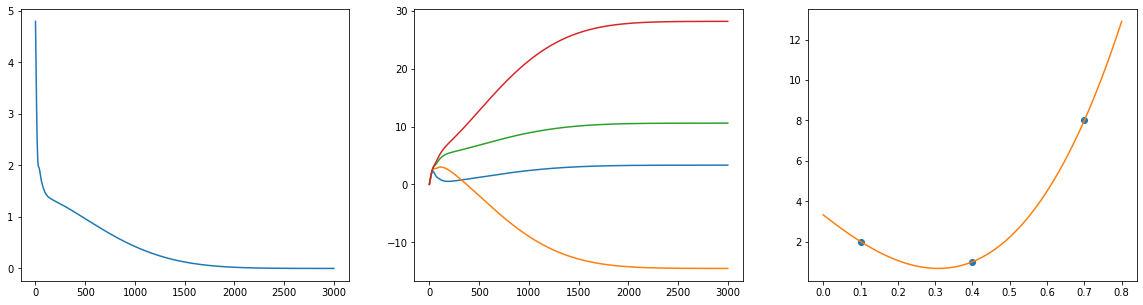

In [47]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.plot(error_sequence)
plt.subplot(1, 3, 2)
plt.plot(W_sequence)
plt.subplot(1, 3, 3)
plt.plot(X, T, 'o')
xs = np.linspace(0, 0.8, 100).reshape(-1, 1)
plt.plot(xs, cubic_model(xs, W));

Always label all axes of plots, using `plt.xlabel` and `plt.ylabel`.  So, don't follow my bad example here.

# Air Quality Data

Download and prepare the data.  The process is slightly modified from what we did in lecture.  Only using the first 46 samples (reduced to 43 after removing samples with missing values).

In [48]:
!curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
!unzip -o AirQualityUCI.zip


Archive:  AirQualityUCI.zip
  inflating: AirQualityUCI.csv       
  inflating: AirQualityUCI.xlsx      


In [49]:
data = pandas.read_csv('AirQualityUCI.csv', delimiter=';', decimal=',',
                        usecols=range(15), na_values=-200)
data = data[['Time', 'CO(GT)']]
data = data[:46]  # only use the first 46 samples
data = data.dropna(axis=0)
    
hour = np.array([int(t[:2]) for t in data['Time']])
CO = np.array(data['CO(GT)'])

T = CO.reshape(-1, 1)
Tnames = ['CO']
X = hour.reshape(-1, 1)
Xnames = ['Hour']
print('X.shape =', X.shape, 'Xnames =', Xnames)
print('T.shape =', T.shape, 'Tnames =', Tnames)

X.shape = (43, 1) Xnames = ['Hour']
T.shape = (43, 1) Tnames = ['CO']


Add code cells here to implement the linear, quadratic, cubic, and quartic models, and to fit the models to the air quality data.

Also add markdown cells that explain each result and summarize your observations of the plots.

# Linear Model

In [50]:
def drange2(start, stop, step):
    numelements = int((stop-start)/float(step))
    for i in range(numelements+1):
            yield start + i*step

In [51]:
def linear_model(X, W):
    # W is column vector
    return X @ W[1:, :] + W[0,:]

In [52]:
def dYdW(X, T, W):
    # One row per sample in X,T.  One column per W component.
    # For first one, is constant 1.
    # For second one, is value of X
    return np.insert(X, 0, 1, axis=1)

def dEdY(X, T, W):
    Y = linear_model(X, W)
    return -2 * (T - Y)
    
def linear_model_gradient(X, T, W):
    result = dEdY(X, T, W).T @ dYdW(X, T, W) / (X.shape[0])
    return result.T

In [53]:
w_bias = 0.5 # 10
w = 0.5
W = np.array([w_bias, w]).reshape(-1, 1)
rho = 0.01
nSteps = 400
W, error_sequence, W_sequence = gradient_descent_adam(linear_model, linear_model_gradient, rmse, X, T, W, rho, nSteps)
print('Adam:  Error is {:.2f}   W is {:.2f}, {:.2f}'.format(rmse(linear_model, X, T, W), W[0,0], W[1,0]))

Adam:  Error is 1.23   W is 0.74, 0.11


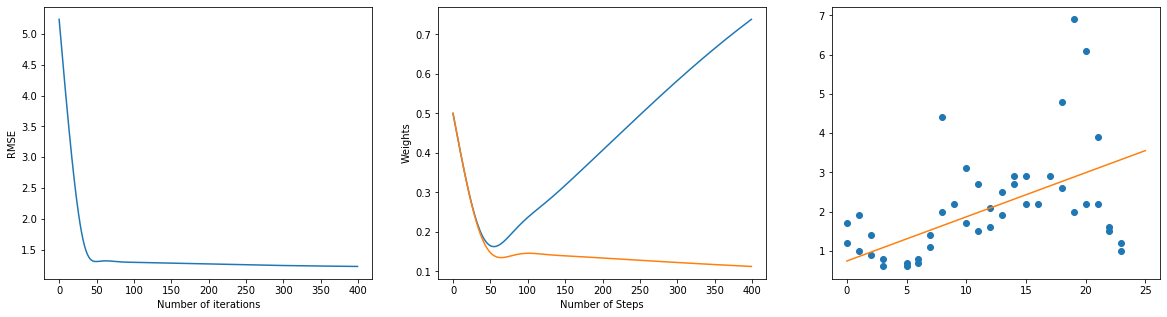

In [54]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.plot(error_sequence)
plt.ylabel("RMSE")
plt.xlabel("Number of iterations");
plt.subplot(1, 3, 2)
plt.plot(W_sequence)
plt.ylabel("Weights")
plt.xlabel("Number of Steps");
plt.subplot(1, 3, 3)
plt.plot(X, T, 'o')
xs = np.linspace(0, 25, 100).reshape(-1, 1)
plt.plot(xs, linear_model(xs, W));

Adam:  Error is 4.69   W is 0.46, 0.46
Adam:  Error is 3.66   W is 0.39, 0.39
Adam:  Error is 2.30   W is 0.28, 0.28
Adam:  Error is 1.34   W is 0.19, 0.17
Adam:  Error is 1.27   W is 0.40, 0.13
Adam:  Error is 1.24   W is 0.62, 0.12
Adam:  Error is 1.22   W is 0.86, 0.10
Adam:  Error is 1.21   W is 1.08, 0.09
Adam:  Error is 1.21   W is 1.11, 0.09
Adam:  Error is 1.21   W is 1.11, 0.09


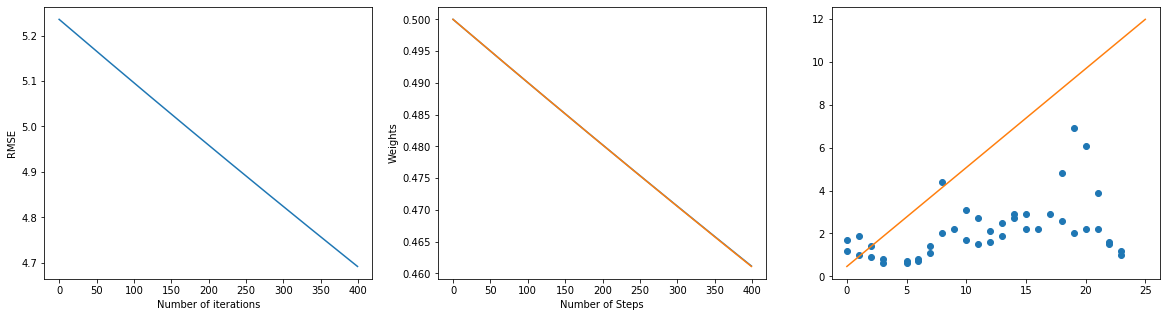

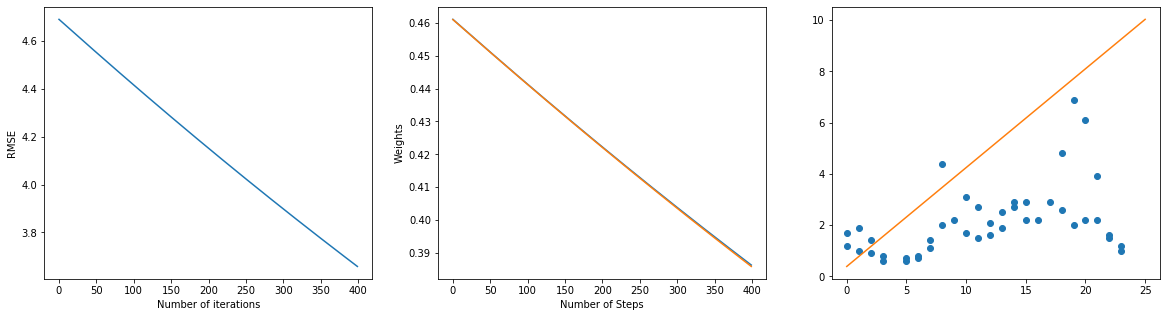

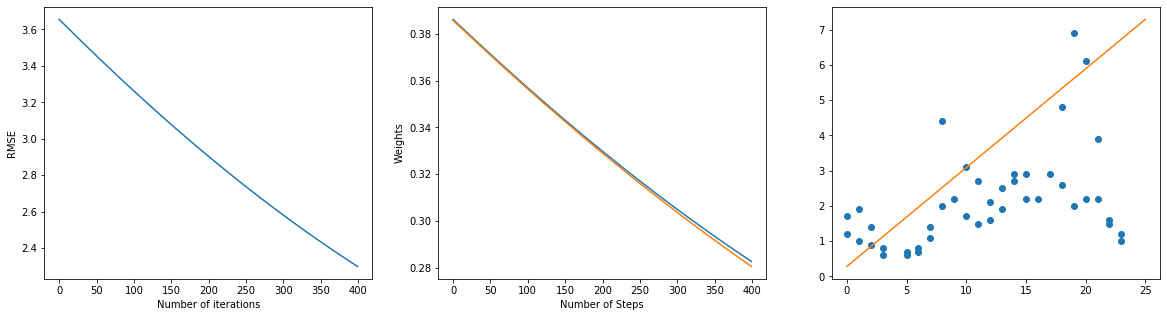

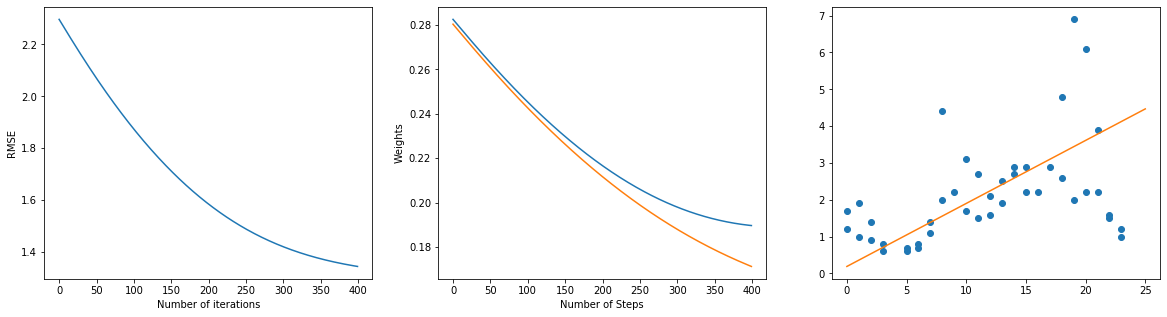

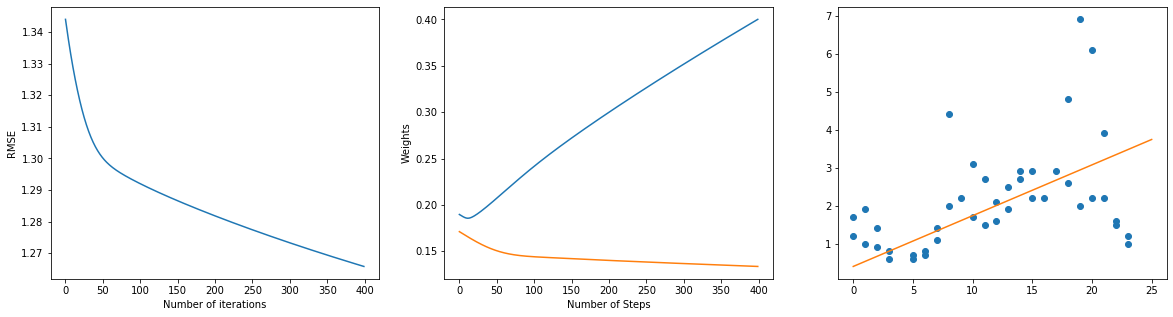

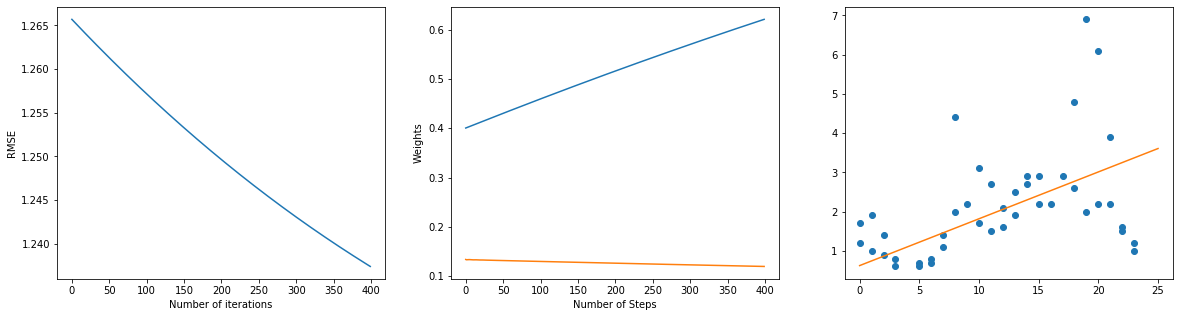

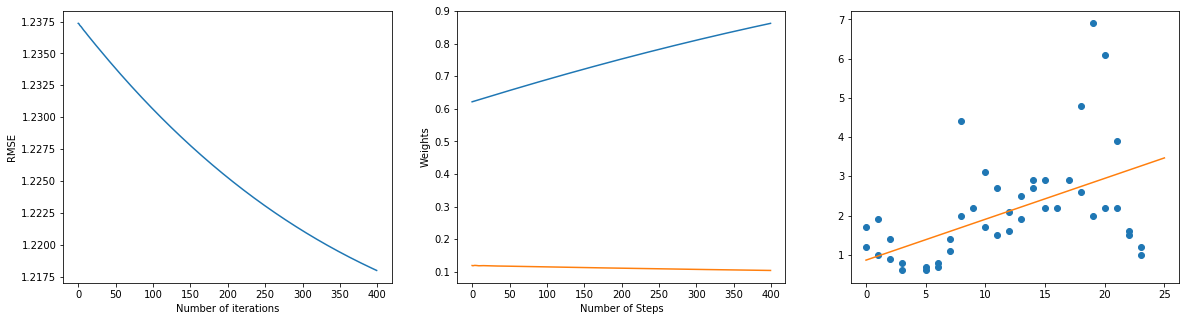

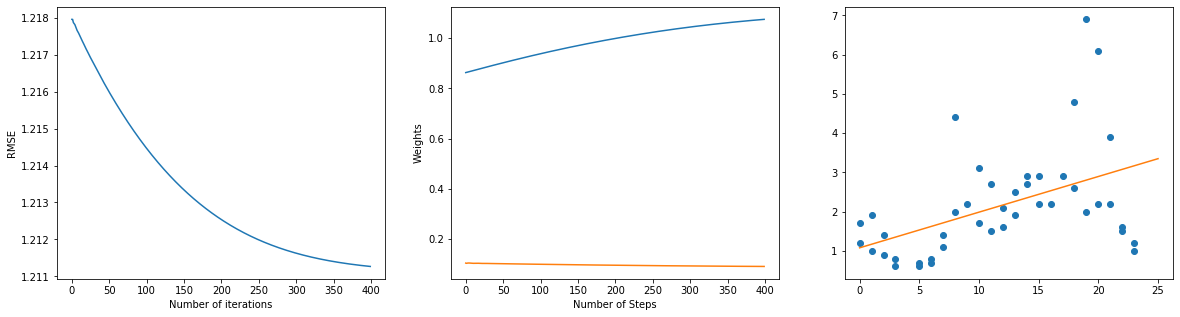

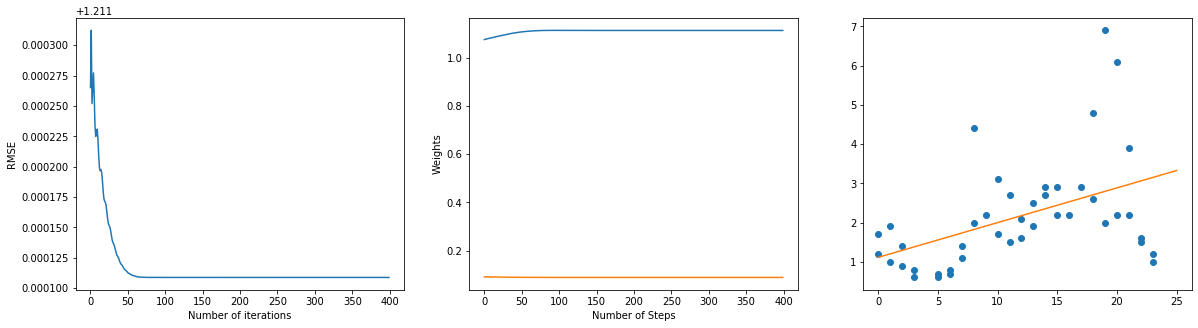

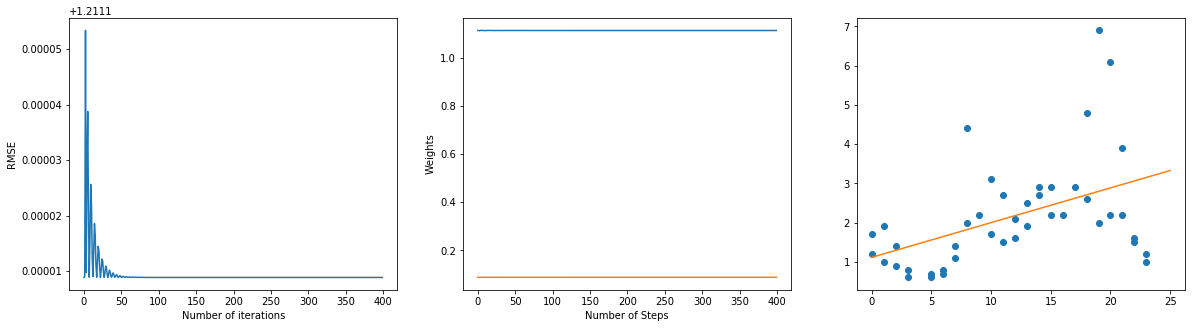

In [55]:
w_bias = 0.5 # 10
w = 0.5
W = np.array([w_bias, w]).reshape(-1, 1)
#rho = 0.01
nSteps = 400
for rho in drange2(0.0001, 0.001, 0.0001):
    W, error_sequence, W_sequence = gradient_descent_adam(linear_model, linear_model_gradient, rmse, X, T, W, rho, nSteps)
    print('Adam:  Error is {:.2f}   W is {:.2f}, {:.2f}'.format(rmse(linear_model, X, T, W), W[0,0], W[1,0]))
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 3, 1)
    plt.plot(error_sequence)
    plt.ylabel("RMSE")
    plt.xlabel("Number of iterations");
    plt.subplot(1, 3, 2)
    plt.plot(W_sequence)
    plt.ylabel("Weights")
    plt.xlabel("Number of Steps");
    plt.subplot(1, 3, 3)
    plt.plot(X, T, 'o')
    xs = np.linspace(0, 25, 100).reshape(-1, 1)
    plt.plot(xs, linear_model(xs, W));

After plotting the gradient descent adam function for the linear model, for different learning rates, i.e. (for rho= 0.0001 to 0.001), we can see that the minimum error is 1.21, at rho= 0.0008, where the bias weights are 1.08 and 0.9. Therefore, the linear function that best fits the given air quality data has a learning rate of 0.0007 and an error of 1.21. This can be observed in the plots given above. As seen from the above plots, increasing the learning rate (rho), decreases the error, however, no such trend is observed in the biases, as they need to be kept in balance with each other to obtain the minimum error at that point.

# Quadratic Model

In [56]:
def quadratic_model(X, W):
    # W is column vector
    n_columns = X.shape[1]
    linear_part = X @ W[1:n_columns + 1, :] + W[0,:]
    nonlinear_part = X**2 @ W[n_columns + 1:n_columns + 2, :]
    return nonlinear_part + linear_part

In [57]:
def dYdW(X, T, W):
    # One row per sample in X,T.  One column per W component.
    # For first one, is constant 1.
    # For second one, is value of X
    linear_part = np.insert(X, 0, 1, axis=1)
    nonlinear_part = X**2
    return np.hstack((linear_part, nonlinear_part))

def dEdY(X, T, W):
    Y = quadratic_model(X, W)
    return -2 * (T - Y)
    
def quadratic_model_gradient(X, T, W):
    result = dEdY(X, T, W).T @ dYdW(X, T, W) / (X.shape[0])
    return result.T

In [58]:
w_bias = 0.5 # 10
w = 0.5
nonlinear_w = 0.1
W = np.array([w_bias, w, nonlinear_w]).reshape(-1, 1)
rho = 0.01
nSteps = 400
W, error_sequence, W_sequence = gradient_descent_adam(quadratic_model, quadratic_model_gradient, rmse, X, T, W, rho, nSteps)
print('Adam:  Error is {:.2f}   W is {:.2f}, {:.2f} {:.2f}'.format(rmse(quadratic_model, X, T, W), W[0,0], W[1,0], W[2,0]))

Adam:  Error is 1.20   W is 0.27, 0.33 -0.01


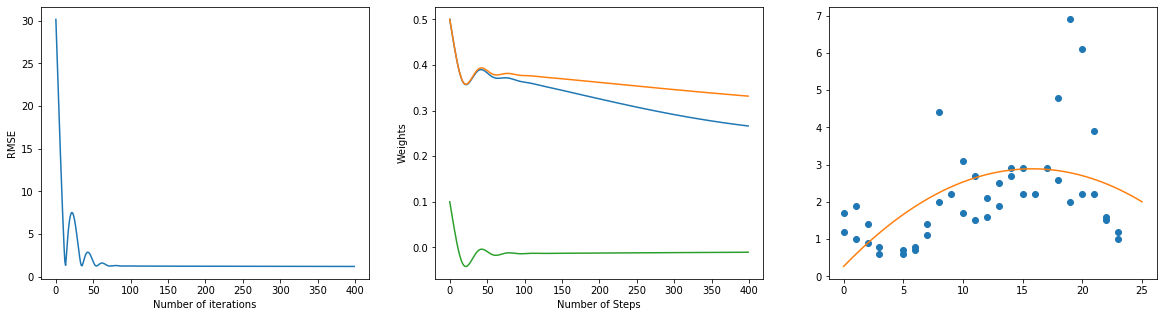

In [59]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.plot(error_sequence)
plt.ylabel("RMSE")
plt.xlabel("Number of iterations");
plt.subplot(1, 3, 2)
plt.plot(W_sequence)
plt.ylabel("Weights")
plt.xlabel("Number of Steps");
plt.subplot(1, 3, 3)
plt.plot(X, T, 'o')
xs = np.linspace(0, 25, 100).reshape(-1, 1)
plt.plot(xs, quadratic_model(xs, W));

Adam:  Error is 1.20   W is 0.27, 0.33 -0.01
Adam:  Error is 1.18   W is 0.56, 0.24 -0.01
Adam:  Error is 1.18   W is 0.72, 0.20 -0.01
Adam:  Error is 1.18   W is 0.48, 0.25 -0.01
Adam:  Error is 1.19   W is 0.81, 0.19 -0.00
Adam:  Error is 1.19   W is 0.40, 0.27 -0.01
Adam:  Error is 1.19   W is 0.89, 0.17 -0.00
Adam:  Error is 1.19   W is 0.32, 0.28 -0.01
Adam:  Error is 1.19   W is 0.98, 0.15 -0.00
Adam:  Error is 1.19   W is 0.23, 0.30 -0.01
Adam:  Error is 1.20   W is 1.06, 0.14 -0.00
Adam:  Error is 1.20   W is 0.15, 0.31 -0.01
Adam:  Error is 1.20   W is 1.15, 0.12 -0.00
Adam:  Error is 1.20   W is 0.06, 0.33 -0.01
Adam:  Error is 1.21   W is 1.23, 0.11 -0.00
Adam:  Error is 1.21   W is -0.02, 0.35 -0.01
Adam:  Error is 1.21   W is 1.31, 0.09 -0.00
Adam:  Error is 1.22   W is -0.10, 0.36 -0.01
Adam:  Error is 1.22   W is 1.40, 0.07 -0.00
Adam:  Error is 1.22   W is -0.19, 0.38 -0.01


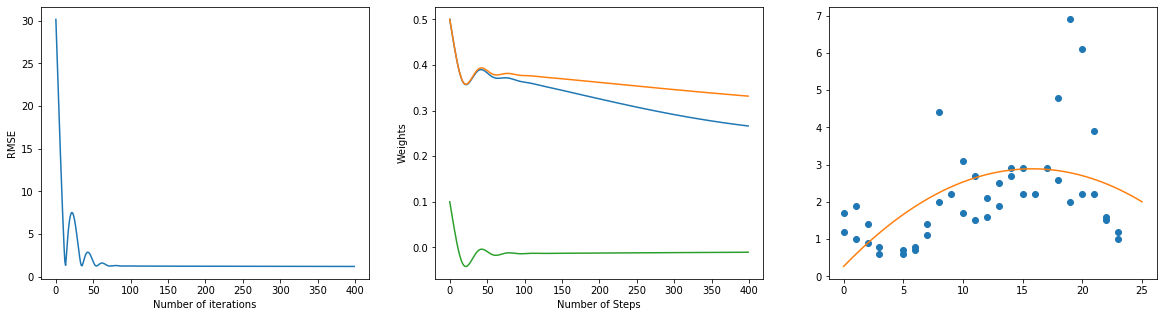

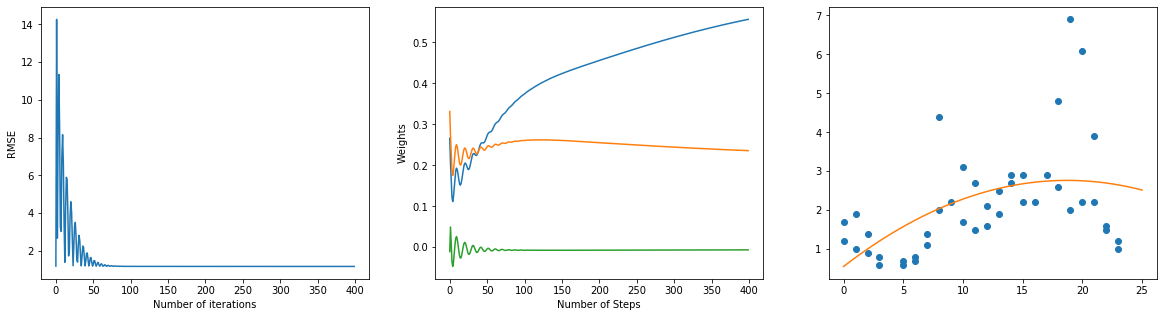

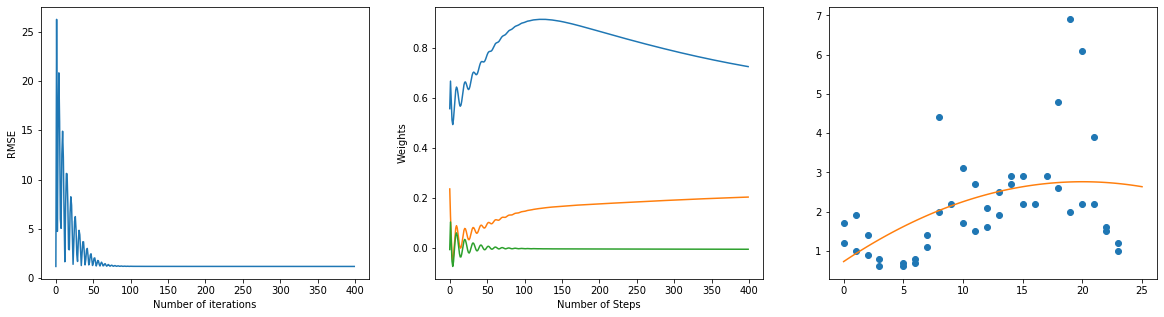

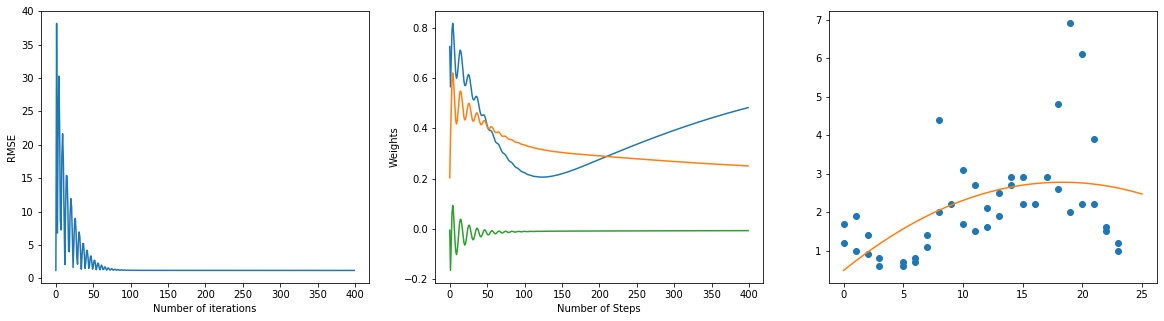

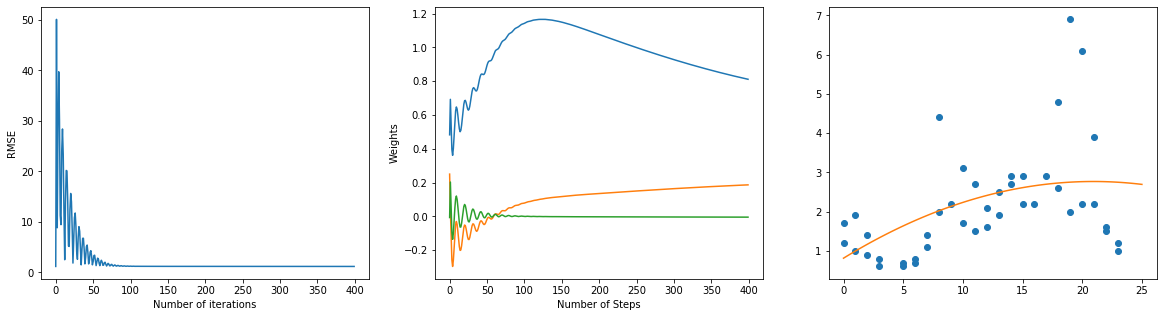

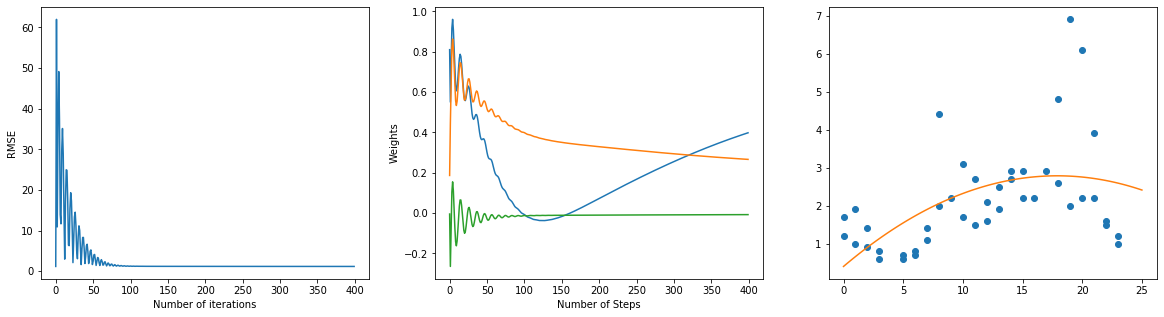

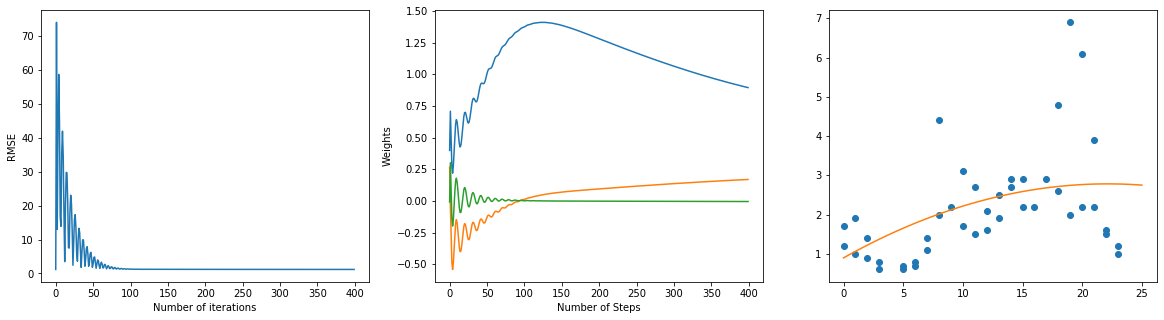

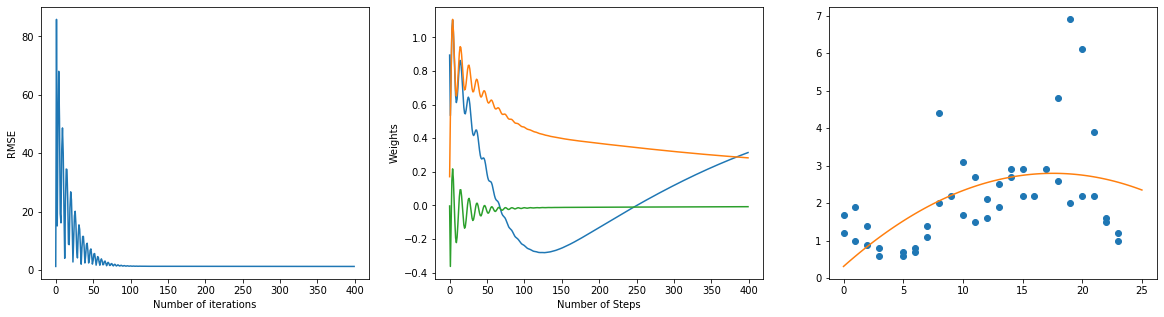

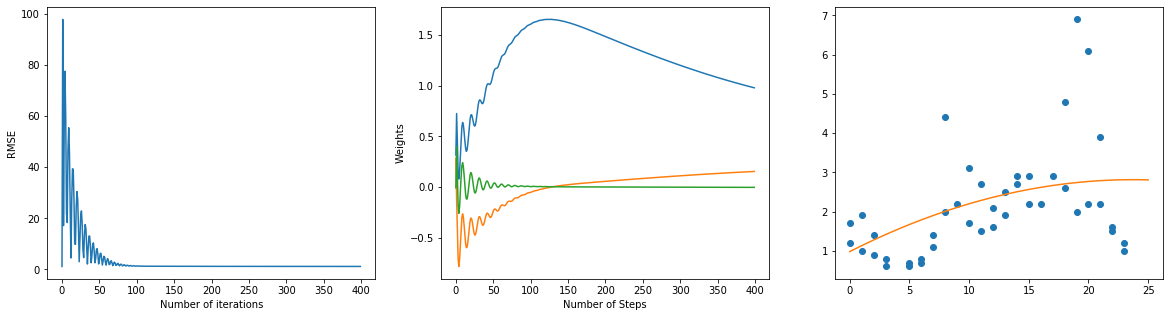

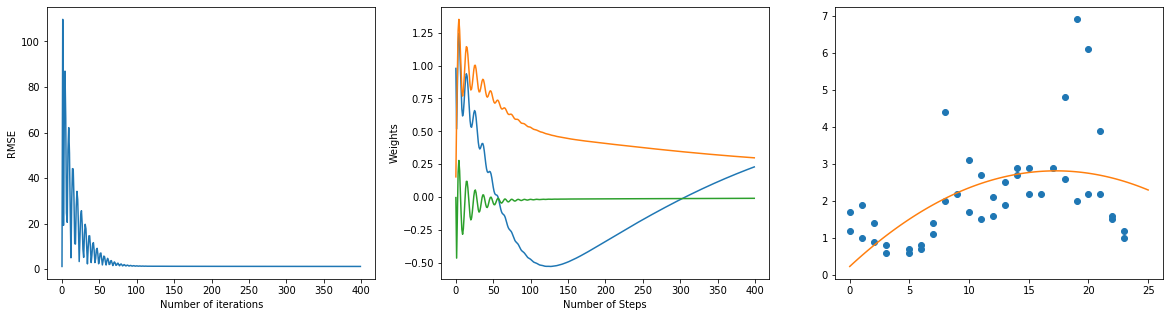

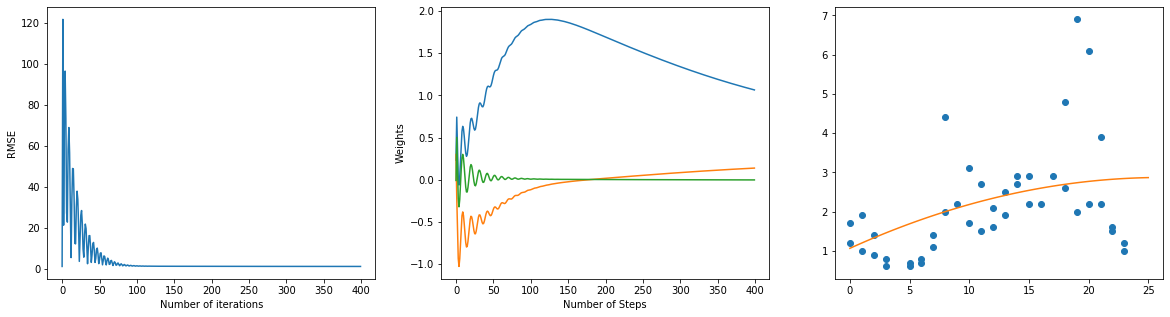

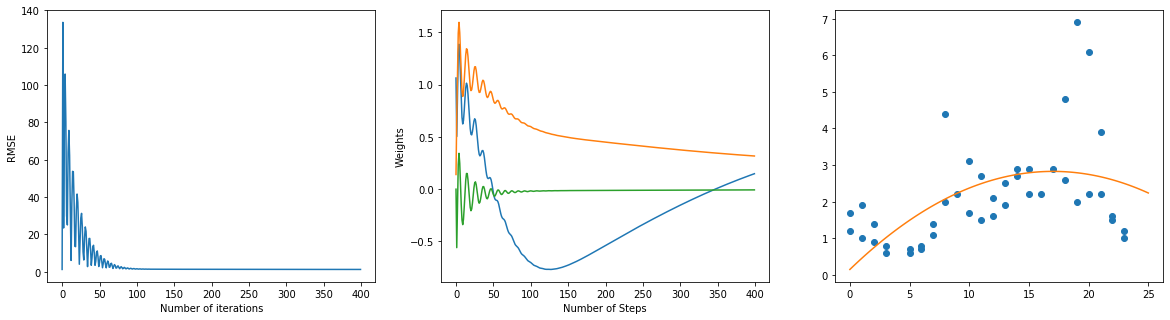

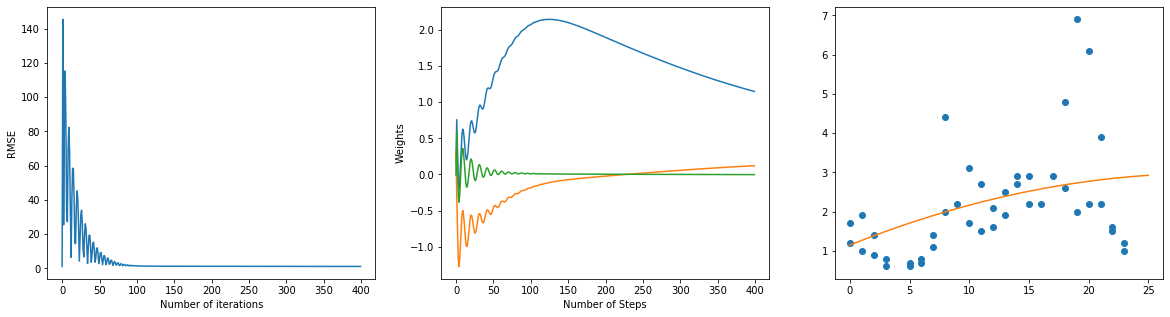

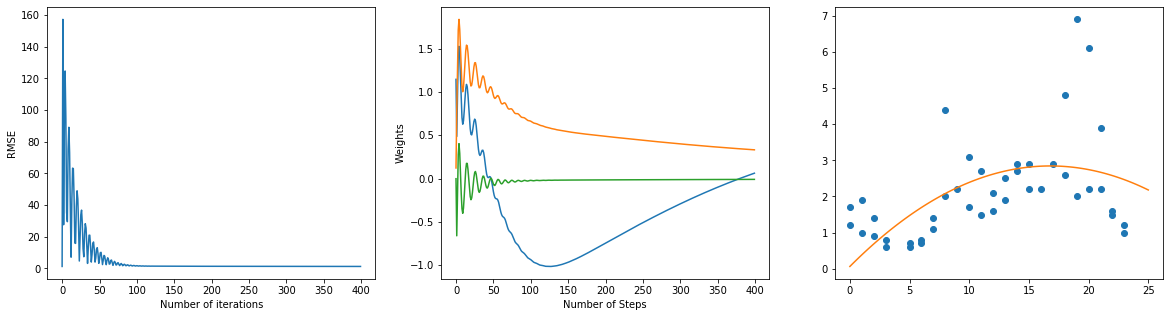

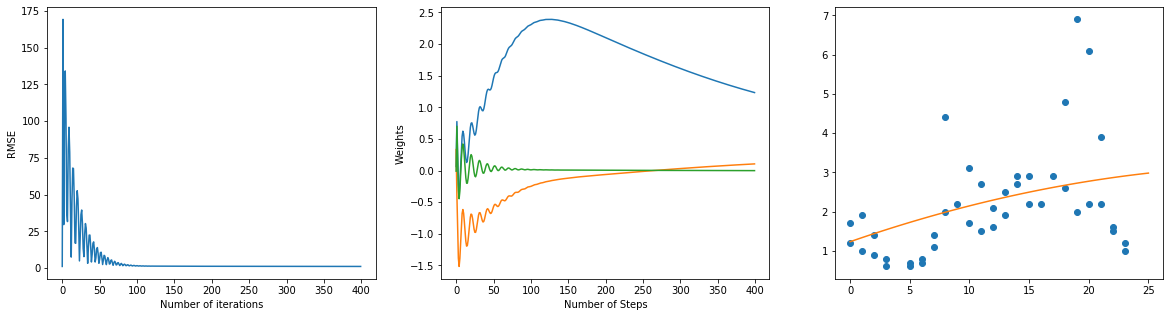

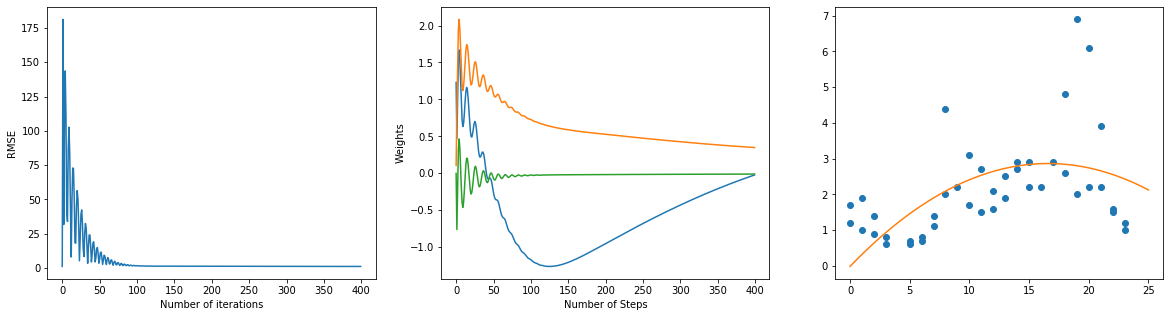

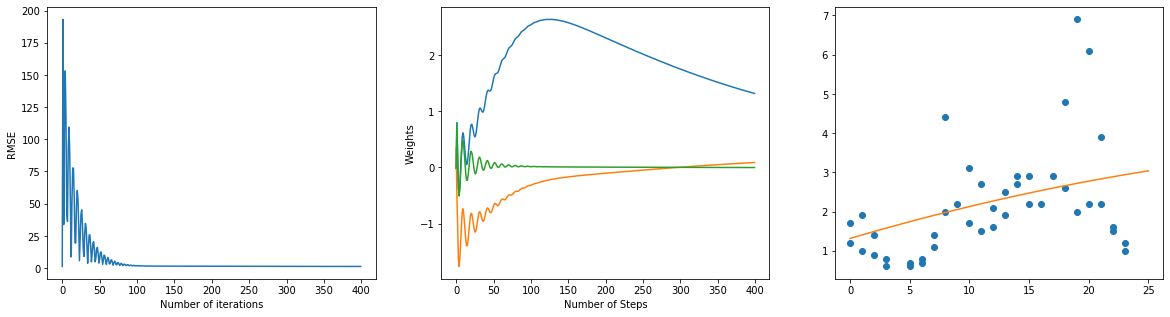

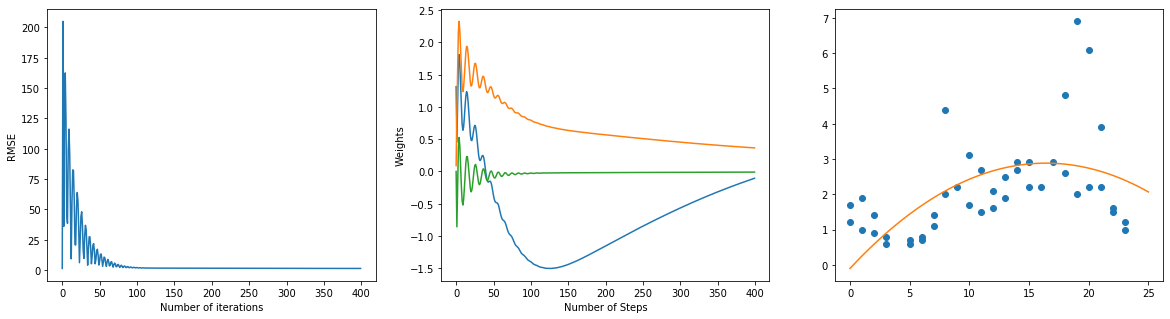

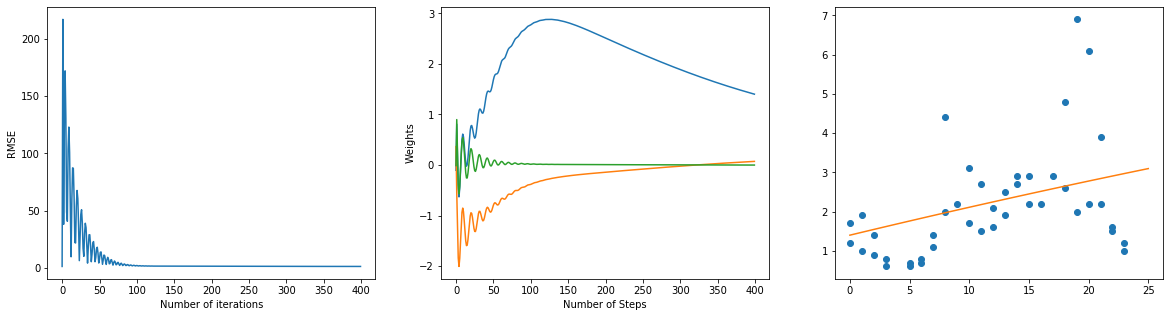

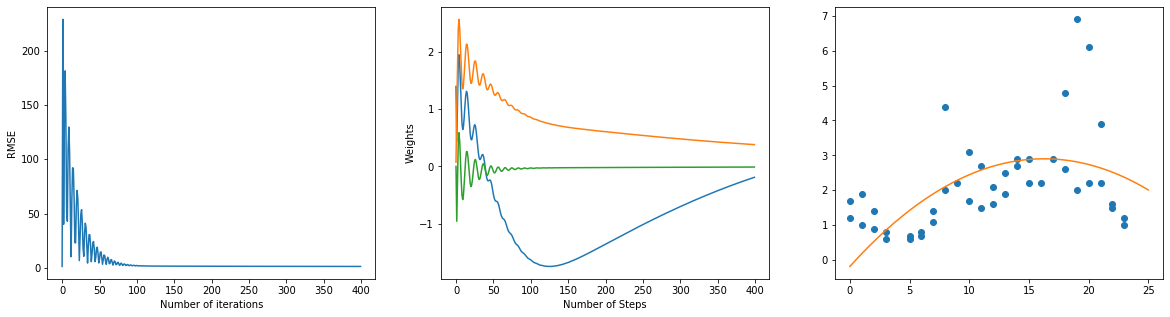

In [60]:
w_bias = 0.5 # 10
w = 0.5
nonlinear_w = 0.1
W = np.array([w_bias, w, nonlinear_w]).reshape(-1, 1)
#rho = 0.01
nSteps = 400
for rho in drange2(0.01, 1, 0.05):
    W, error_sequence, W_sequence = gradient_descent_adam(quadratic_model, quadratic_model_gradient, rmse, X, T, W, rho, nSteps)
    print('Adam:  Error is {:.2f}   W is {:.2f}, {:.2f} {:.2f}'.format(rmse(quadratic_model, X, T, W), W[0,0], W[1,0], W[2,0]))
    
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 3, 1)
    plt.plot(error_sequence)
    plt.ylabel("RMSE")
    plt.xlabel("Number of iterations");
    plt.subplot(1, 3, 2)
    plt.plot(W_sequence)
    plt.ylabel("Weights")
    plt.xlabel("Number of Steps");
    plt.subplot(1, 3, 3)
    plt.plot(X, T, 'o')
    xs = np.linspace(0, 25, 100).reshape(-1, 1)
    plt.plot(xs, quadratic_model(xs, W));

After plotting the gradient descent adam function for the quadratic model, for different learning rates, i.e. (for rho= 0.01 to 1), we can see that the minimum error is 1.18, at rho= 0.06, where the bias weights are 0.56 and 0.24 and -0.01.
Therefore, the quadratic function that best fits the given air quality data has a learning rate of 0.06 and an error of 1.18. This can be observed in the plots given above.
As seen from the above plots, the error decreases, remains constant and increases again with respect to a constant increase in the learning rate (rho). Thus the plot proves that it is a cubic function. However, no such trend is observed in the biases, as they need to be kept in balance with each other to obtain the minimum error at that point. Experimenting with different ranges for the learning rates, this is the best range, as it shows how the error varies, selecting a smaller range shows saturation in this case

# Cubic Model

In [61]:
def cubic_model(X, W):
    return np.hstack((X, X**2, X**3)) @ W[1:, :] + W[0, :]

def cubic_model_gradient(X, T, W):
    dEdY = -2 * (T - cubic_model(X, W))
    all_but_bias = np.hstack((X, X**2, X**3))
    dYdW = np.insert(all_but_bias, 0, 1, axis=1)
    result = dEdY.T @ dYdW / X.shape[0]
    return result.T

In [62]:
W = np.zeros((4, 1))
rho = 1.e-1
n_steps = 3000
W, error_sequence, W_sequence = gradient_descent_adam(cubic_model, cubic_model_gradient, rmse, X, T, W, rho, n_steps)
print(f'Final RMSE for rho {rho} at step {n_steps} is {error_sequence[-1]:4f}')

Final RMSE for rho 0.1 at step 3000 is 1.084888


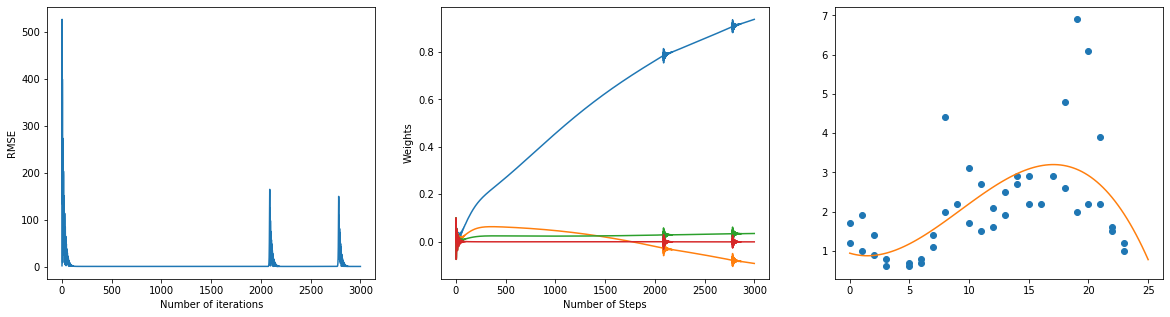

In [63]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.plot(error_sequence)
plt.ylabel("RMSE")
plt.xlabel("Number of iterations");
plt.subplot(1, 3, 2)
plt.plot(W_sequence)
plt.ylabel("Weights")
plt.xlabel("Number of Steps");
plt.subplot(1, 3, 3)
plt.plot(X, T, 'o')
xs = np.linspace(0, 25, 100).reshape(-1, 1)
plt.plot(xs, cubic_model(xs, W));

Final RMSE for rho 0.1 at step 3000 is 1.041580
Final RMSE for rho 0.11 at step 3000 is 1.033043
Final RMSE for rho 0.12000000000000001 at step 3000 is 1.029802
Final RMSE for rho 0.13 at step 3000 is 1.028570
Final RMSE for rho 0.14 at step 3000 is 1.028304
Final RMSE for rho 0.15000000000000002 at step 3000 is 1.028284
Final RMSE for rho 0.16 at step 3000 is 1.028277
Final RMSE for rho 0.17 at step 3000 is 1.028273
Final RMSE for rho 0.18 at step 3000 is 1.028321
Final RMSE for rho 0.19 at step 3000 is 1.028271
Final RMSE for rho 0.2 at step 3000 is 1.028274
Final RMSE for rho 0.21000000000000002 at step 3000 is 1.028275
Final RMSE for rho 0.22 at step 3000 is 1.028271
Final RMSE for rho 0.23 at step 3000 is 1.028272
Final RMSE for rho 0.24000000000000002 at step 3000 is 1.028271
Final RMSE for rho 0.25 at step 3000 is 1.028274
Final RMSE for rho 0.26 at step 3000 is 1.030152
Final RMSE for rho 0.27 at step 3000 is 1.028271
Final RMSE for rho 0.28 at step 3000 is 1.028285
Final RMSE 

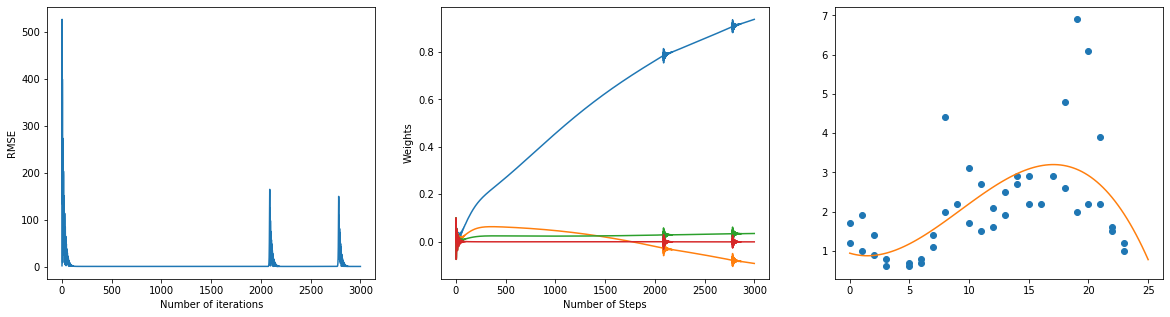

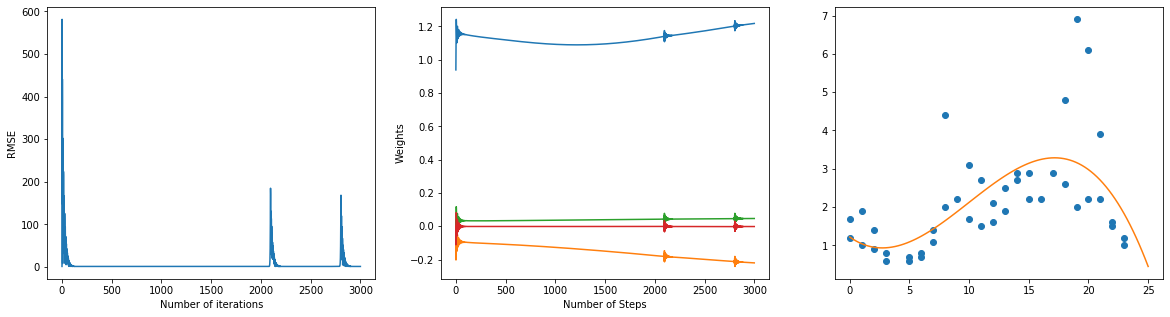

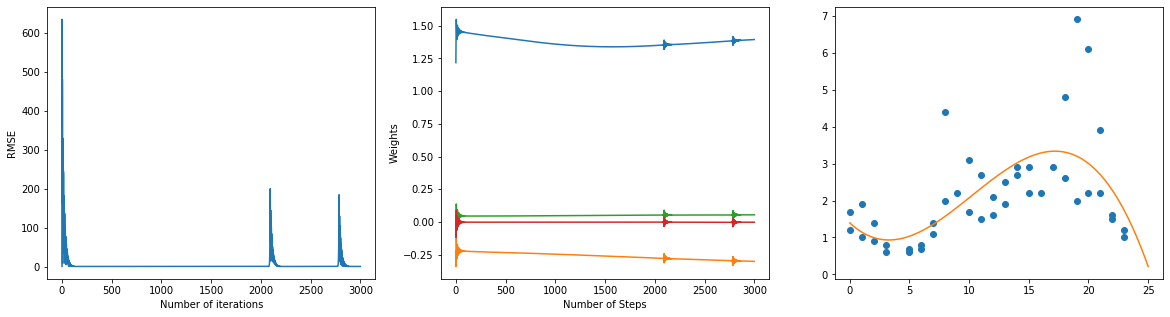

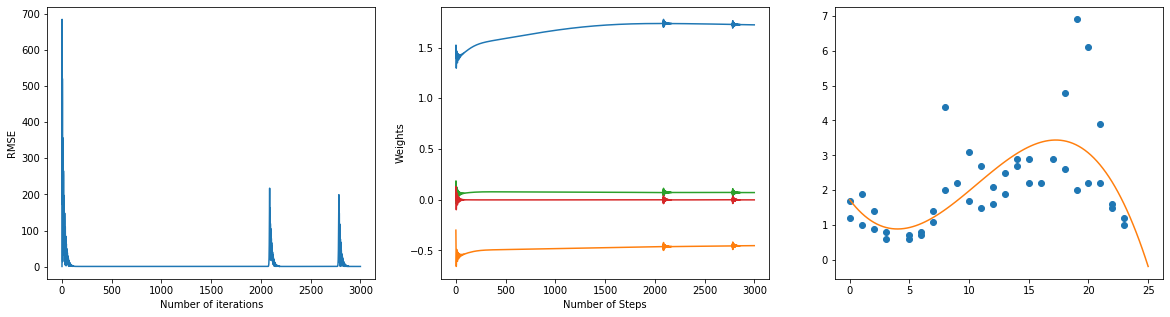

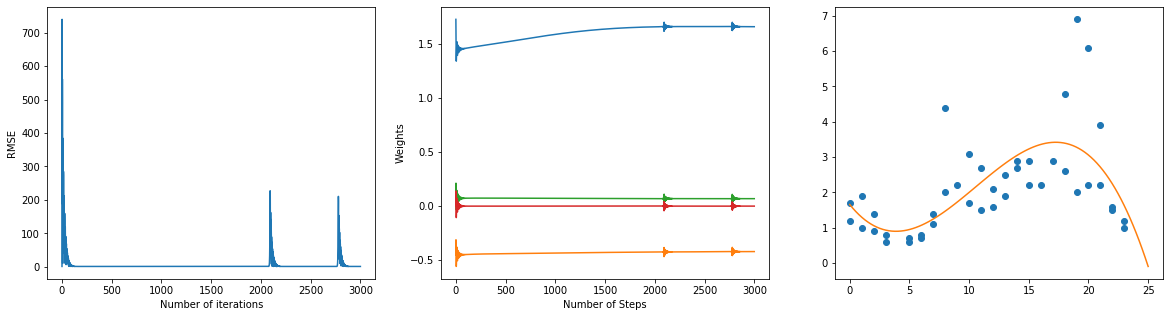

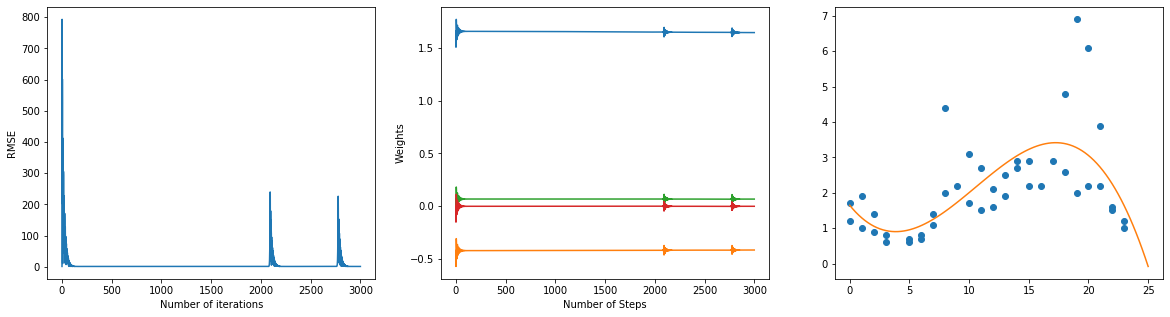

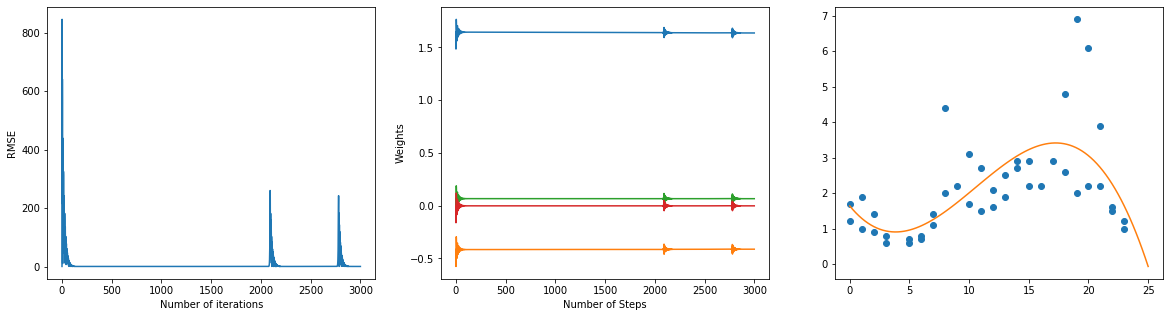

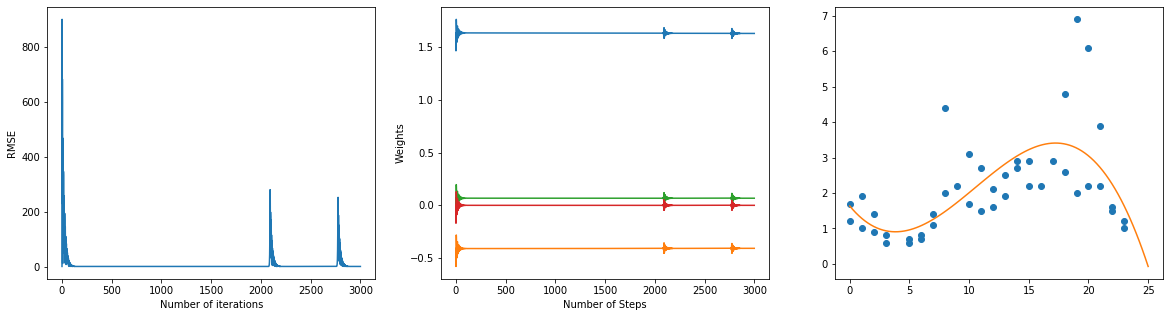

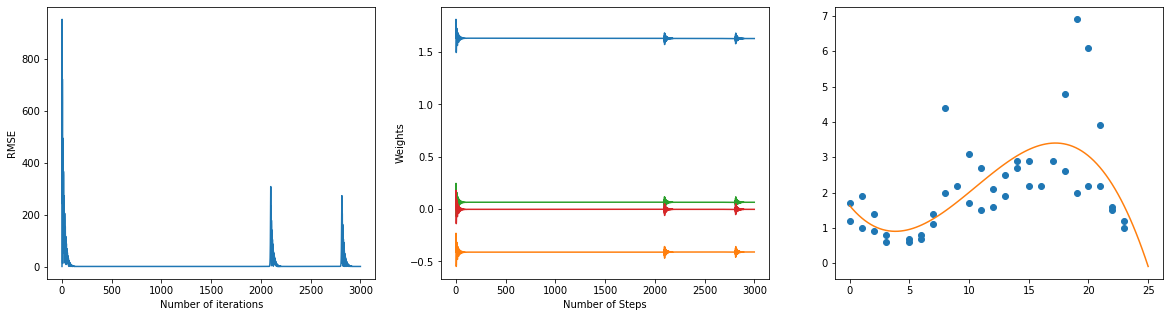

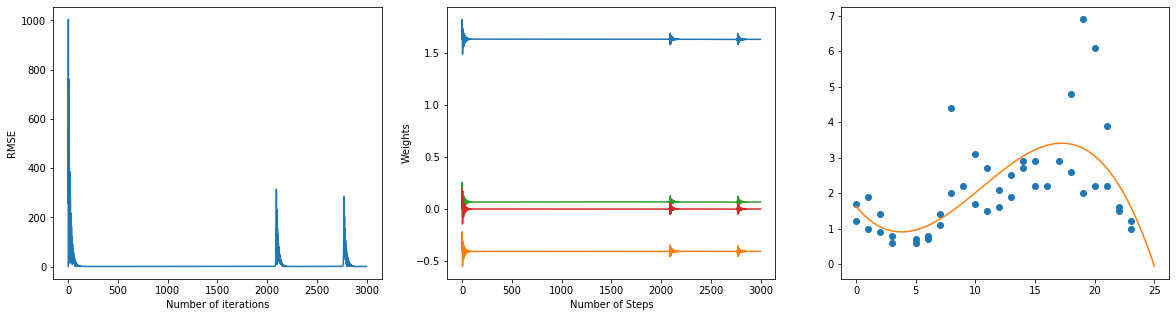

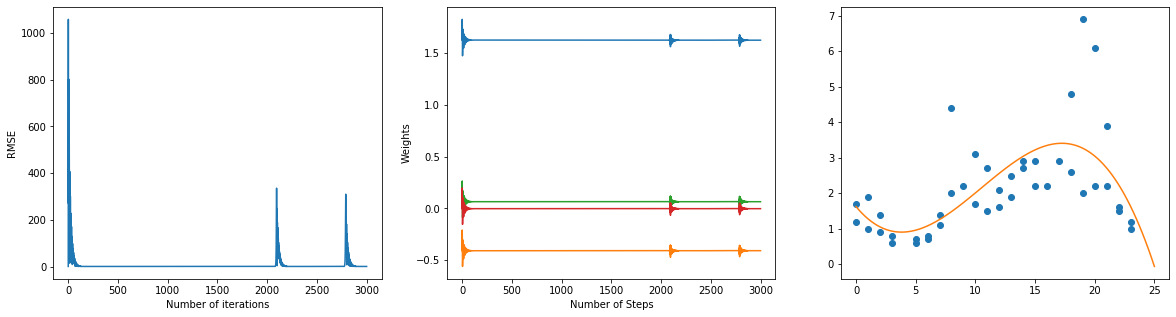

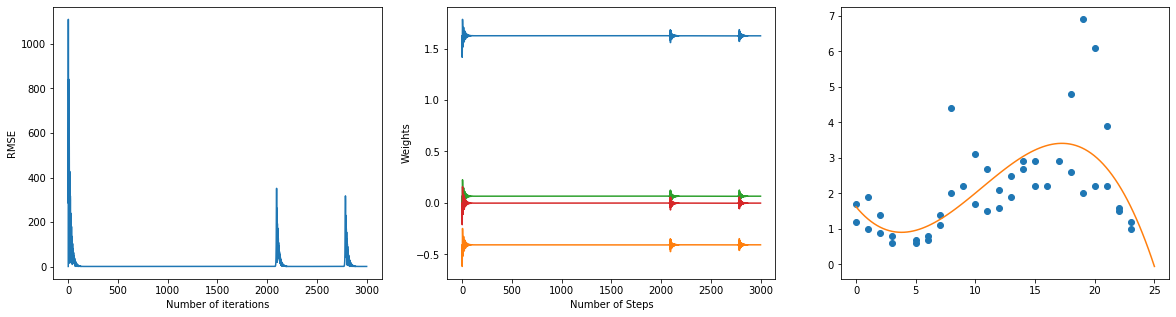

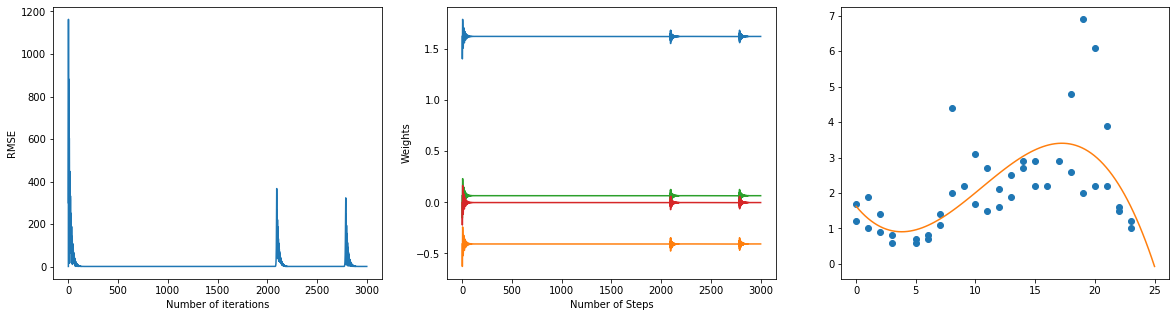

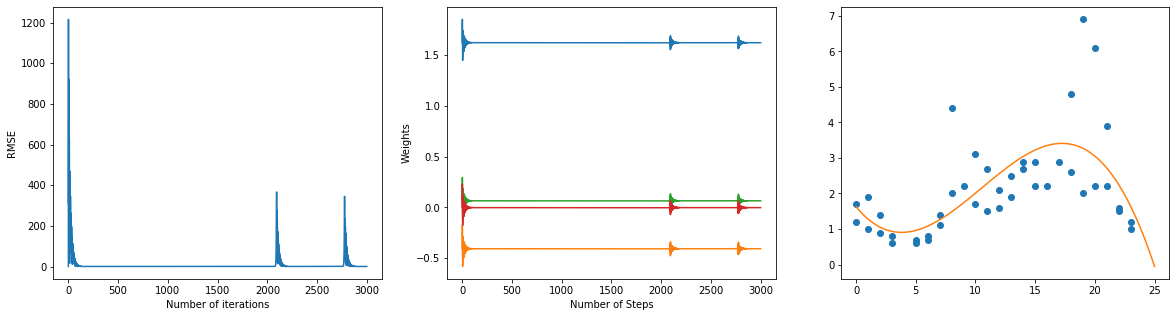

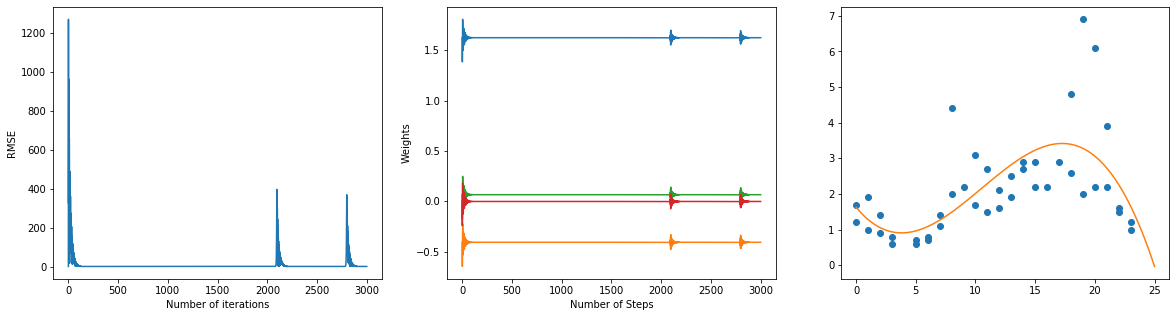

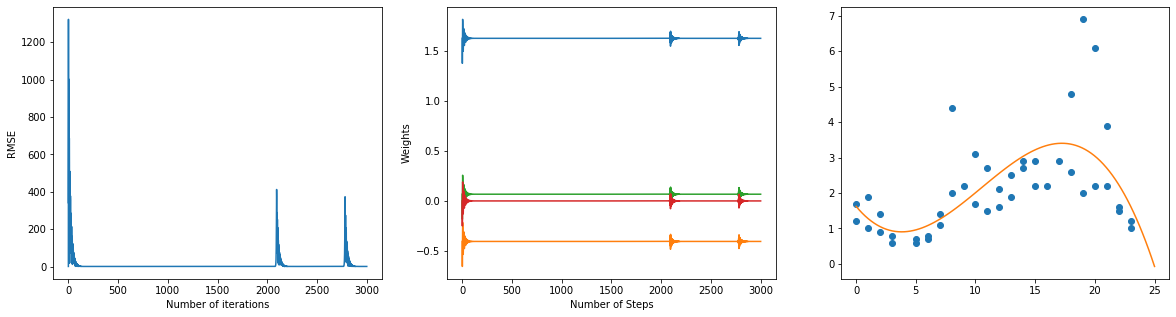

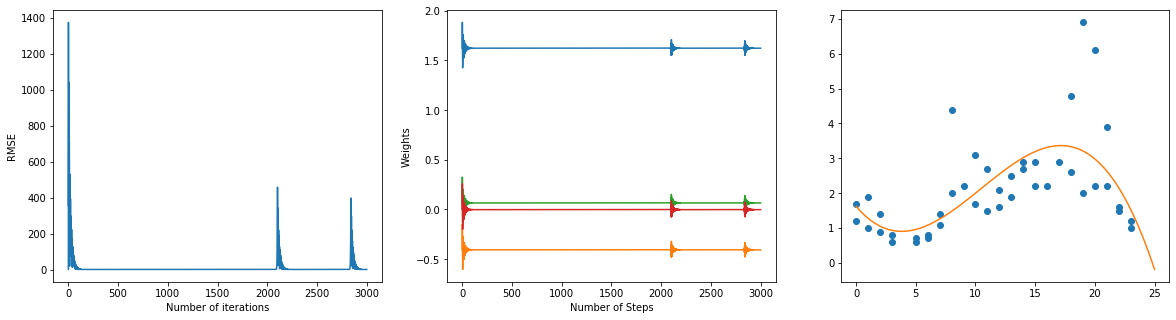

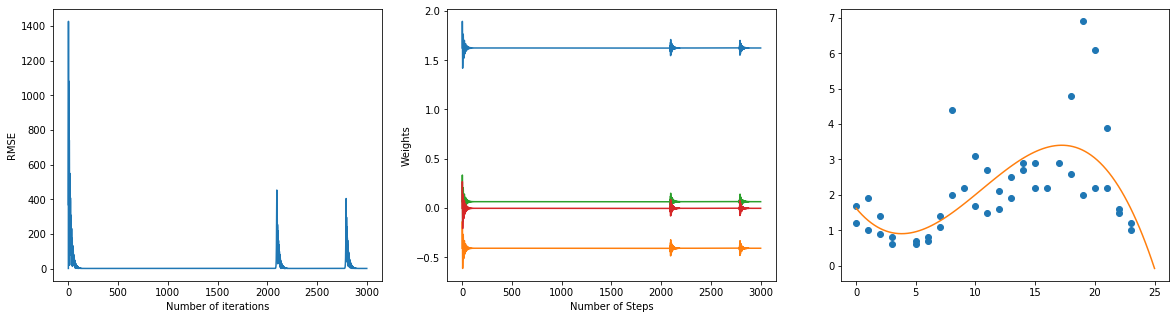

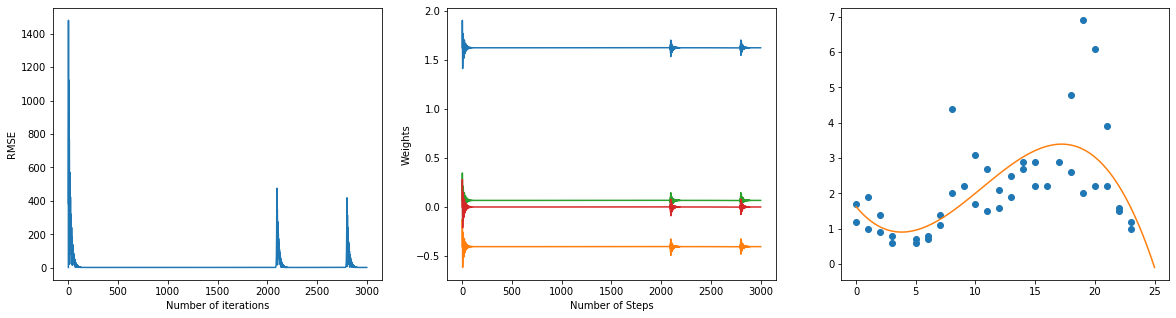

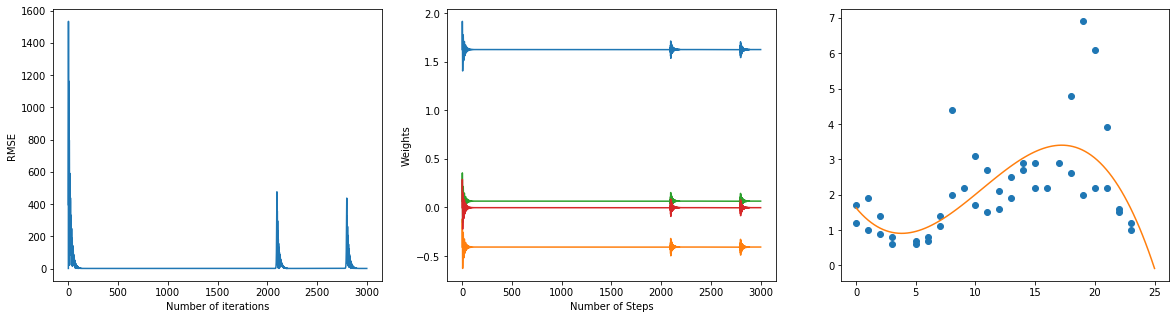

In [64]:
W = np.zeros((4, 1))

n_steps = 3000
for rho in drange2(1e-1, 3e-1, 1e-2):
    
    W, error_sequence, W_sequence = gradient_descent_adam(cubic_model, cubic_model_gradient, rmse, X, T, W, rho, n_steps)
    print(f'Final RMSE for rho {rho} at step {n_steps} is {np.sqrt(error_sequence[-1]):4f}')
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 3, 1)
    plt.plot(error_sequence)
    plt.ylabel("RMSE")
    plt.xlabel("Number of iterations");
    plt.subplot(1, 3, 2)
    plt.plot(W_sequence)
    plt.ylabel("Weights")
    plt.xlabel("Number of Steps");
    plt.subplot(1, 3, 3)
    plt.plot(X, T, 'o')
    xs = np.linspace(0, 25, 100).reshape(-1, 1)
    plt.plot(xs, cubic_model(xs, W));

After plotting the gradient descent adam function for the cubic model, for different learning rates, i.e. (for rho= 0.1 to 0.3), we can see that the minimum error is 1.028271, at rho= 0.19.
Therefore, the cubic function that best fits the given air quality data has a learning rate of 0.19 and an error of 1.028271. As can be observed from the graphs the minimum error= 1.028271, repeats at rho=0.22, 0.27 as well, thus the plot proves that it is a cubic function. 
As seen from the above plots, the error decreases, increases and decreases again and again with respect to a constant increase in the learning rate (rho), however, no such trend is observed in the biases, as they need to be kept in balance with each other to obtain the minimum error at that point. Selecting this range for the learning rate was the best option as it shows the points where the lowest error is repeated, selecting a smaller range made it difficult to show the variation of the error.

# Quartic Model

The equation for quartic model can be give as:
$$ y_i = w_0 + w_1 x_i + w_2 x_i^2 + w_3 x_i^3 + w_4 x_i^4 $$

In [65]:
def quartic_model(X, W):
    return np.hstack((X, X**2, X**3, X**4)) @ W[1:, :] + W[0, :]

def quartic_model_gradient(X, T, W):
    dEdY = -2 * (T - quartic_model(X, W))
    all_but_bias = np.hstack((X, X**2, X**3, X**4))
    dYdW = np.insert(all_but_bias, 0, 1, axis=1)
    result = dEdY.T @ dYdW / X.shape[0]
    return result.T

In [66]:
W = np.zeros((5, 1))
rho = 1.e-1
n_steps = 3000

W, error_sequence, W_sequence = gradient_descent_adam(quartic_model, quartic_model_gradient, rmse, X, T, W, rho, n_steps)
print(f'Final RMSE for rho {rho} at step {n_steps} is {np.sqrt(error_sequence[-1]):4f}')

Final RMSE for rho 0.1 at step 3000 is 1.065271


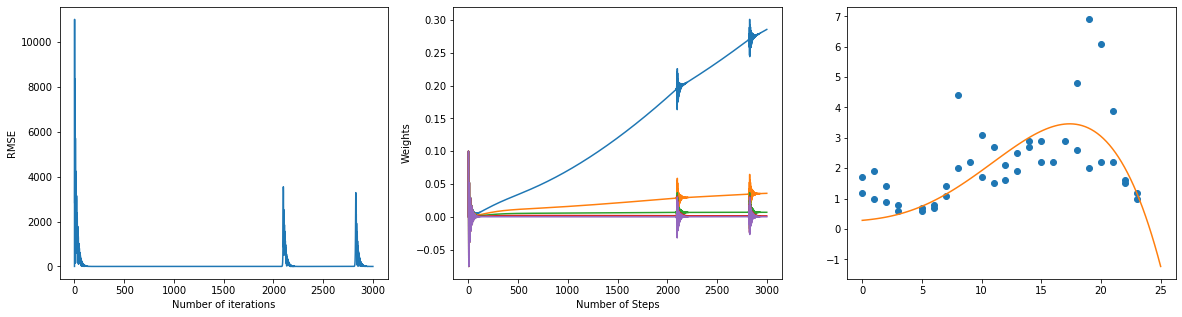

In [67]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.plot(error_sequence)
plt.ylabel("RMSE")
plt.xlabel("Number of iterations");
plt.subplot(1, 3, 2)
plt.plot(W_sequence)
plt.ylabel("Weights")
plt.xlabel("Number of Steps");
plt.subplot(1, 3, 3)
plt.plot(X, T, 'o')
xs = np.linspace(0, 25, 100).reshape(-1, 1)
plt.plot(xs, quartic_model(xs, W));

Final RMSE for rho 0.1 at step 3000 is 1.065271
Final RMSE for rho 0.11 at step 3000 is 1.063095
Final RMSE for rho 0.12000000000000001 at step 3000 is 1.052984
Final RMSE for rho 0.13 at step 3000 is 1.141500
Final RMSE for rho 0.14 at step 3000 is 1.067710
Final RMSE for rho 0.15000000000000002 at step 3000 is 1.767702
Final RMSE for rho 0.16 at step 3000 is 1.256812
Final RMSE for rho 0.17 at step 3000 is 1.261012
Final RMSE for rho 0.18 at step 3000 is 1.111950
Final RMSE for rho 0.19 at step 3000 is 1.669059
Final RMSE for rho 0.2 at step 3000 is 1.448239
Final RMSE for rho 0.21000000000000002 at step 3000 is 1.019159
Final RMSE for rho 0.22 at step 3000 is 2.013183
Final RMSE for rho 0.23 at step 3000 is 1.021319
Final RMSE for rho 0.24000000000000002 at step 3000 is 1.492200
Final RMSE for rho 0.25 at step 3000 is 1.035128
Final RMSE for rho 0.26 at step 3000 is 1.046015
Final RMSE for rho 0.27 at step 3000 is 1.481444
Final RMSE for rho 0.28 at step 3000 is 1.371389
Final RMSE 

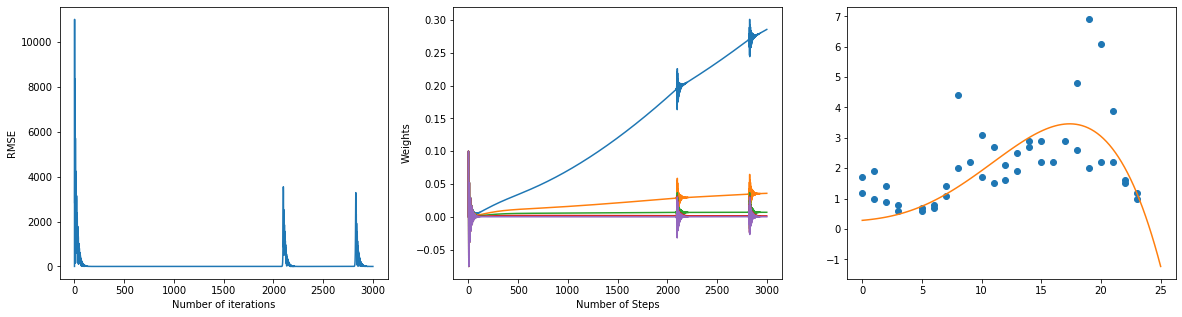

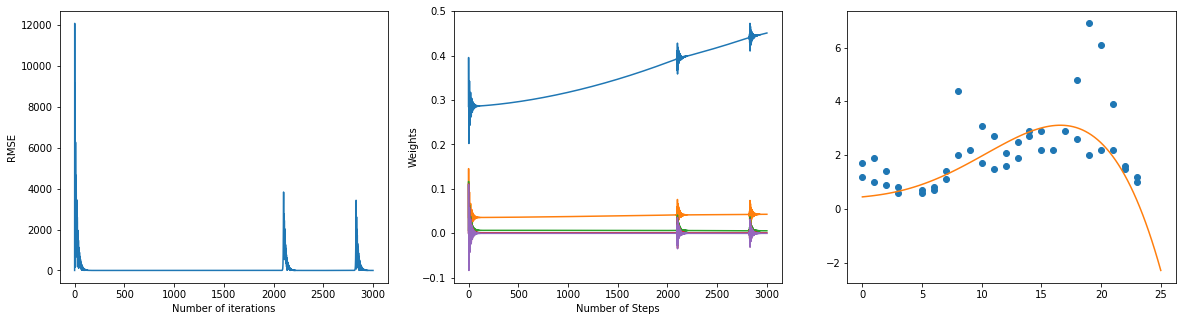

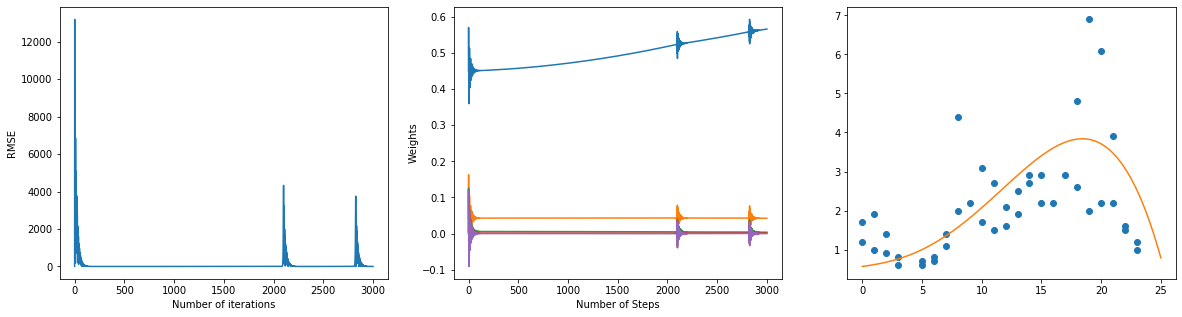

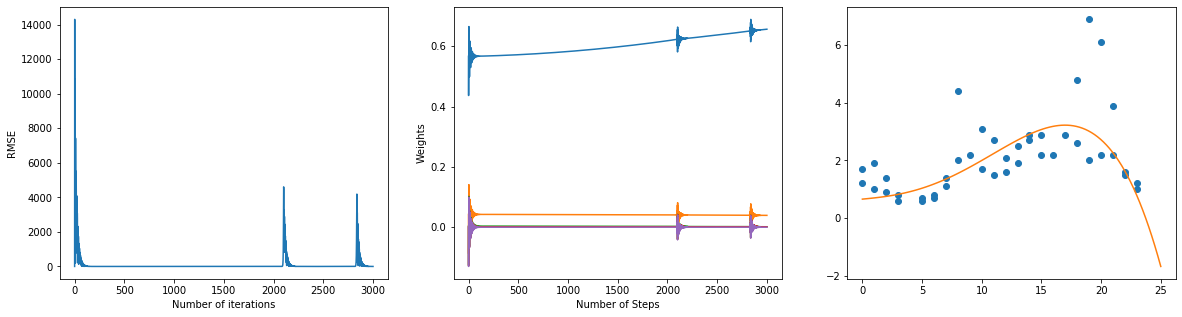

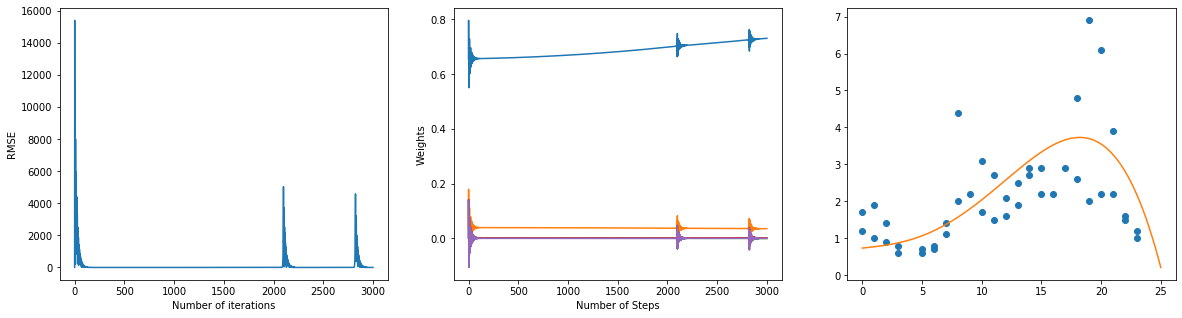

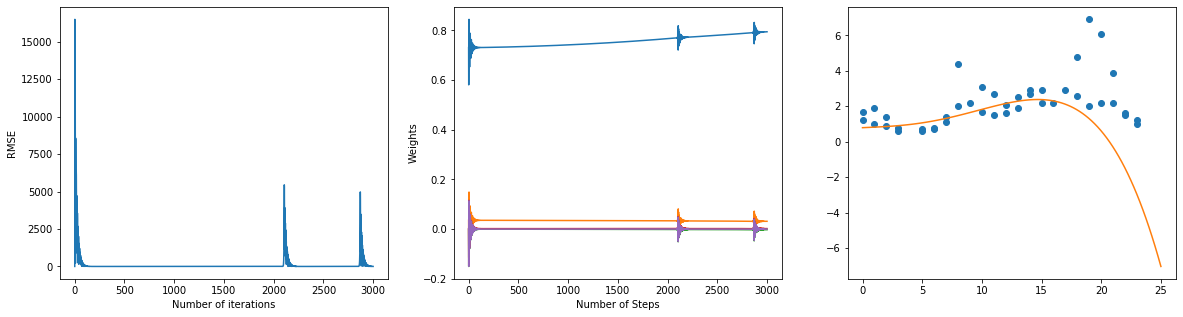

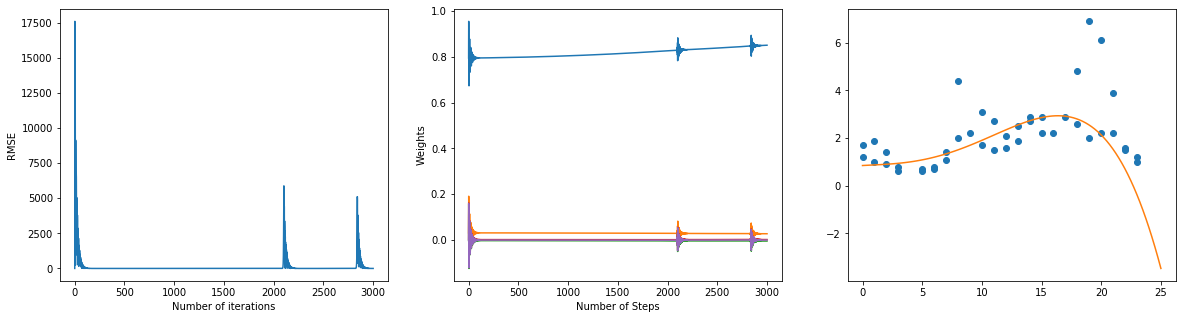

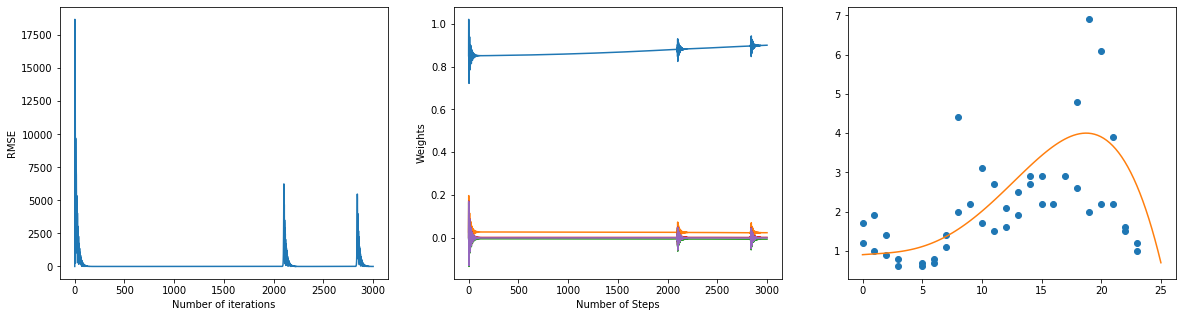

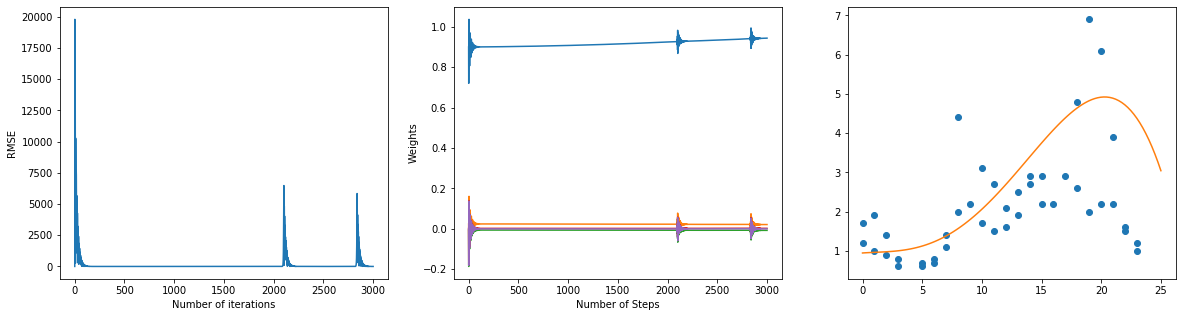

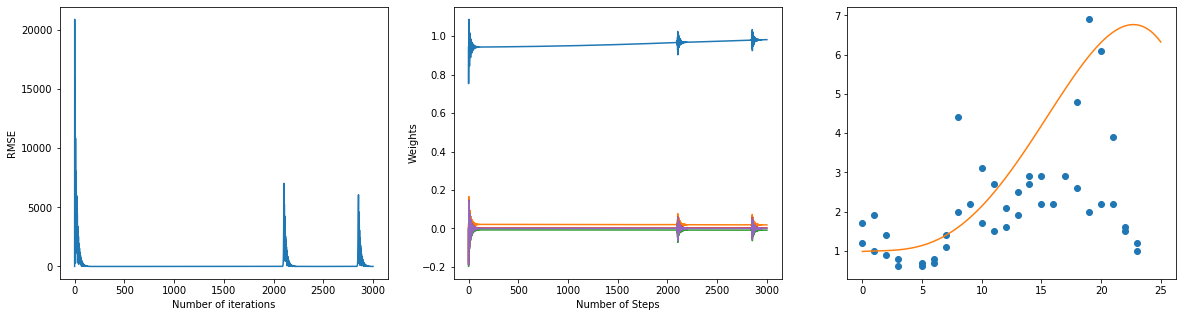

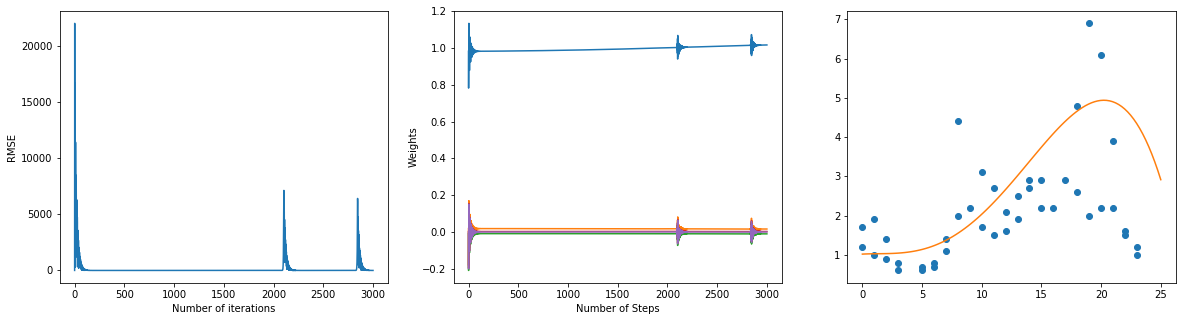

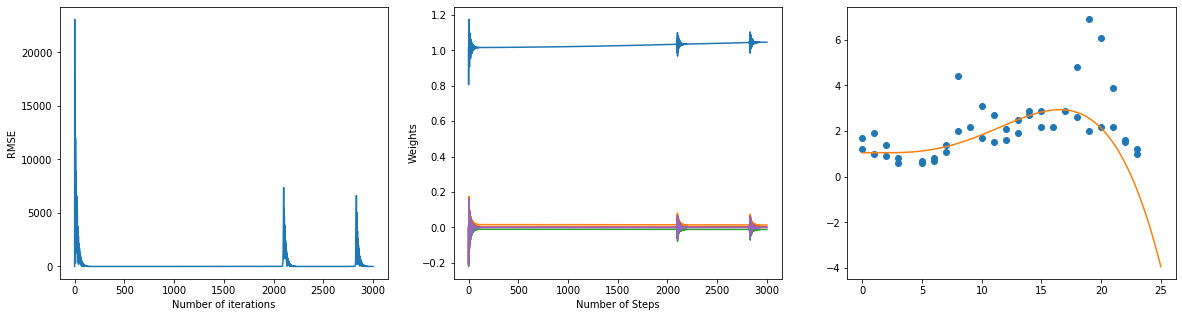

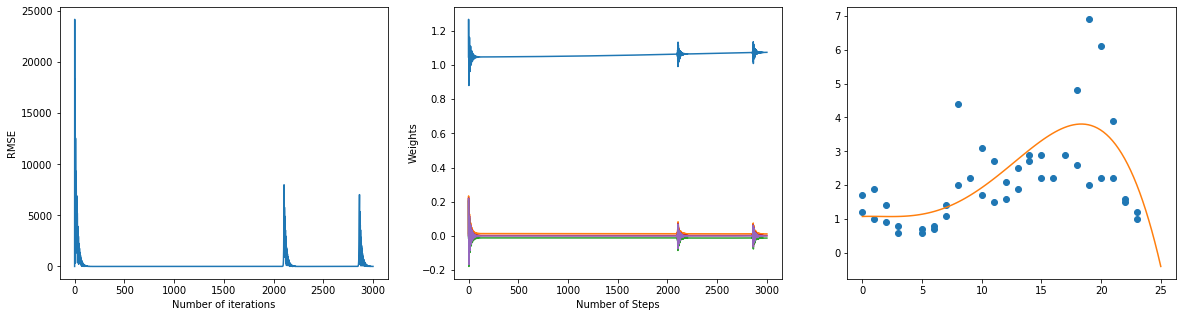

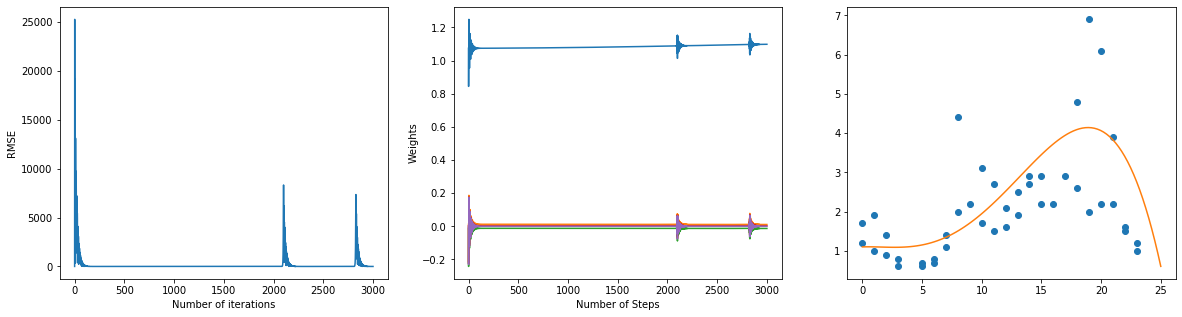

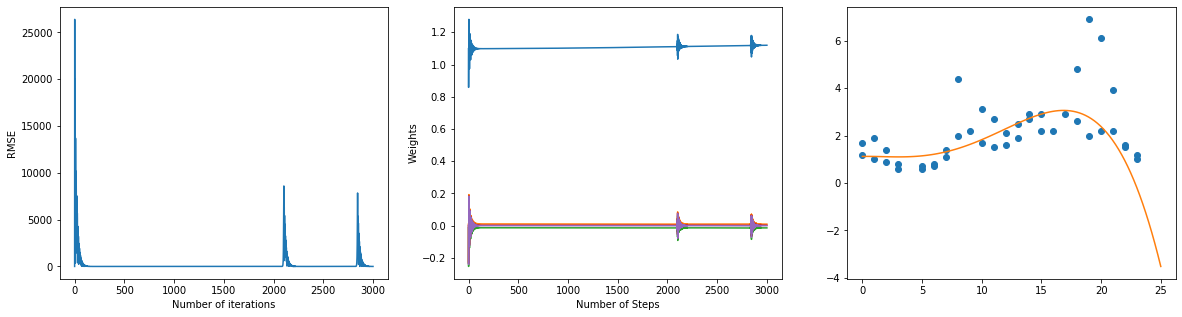

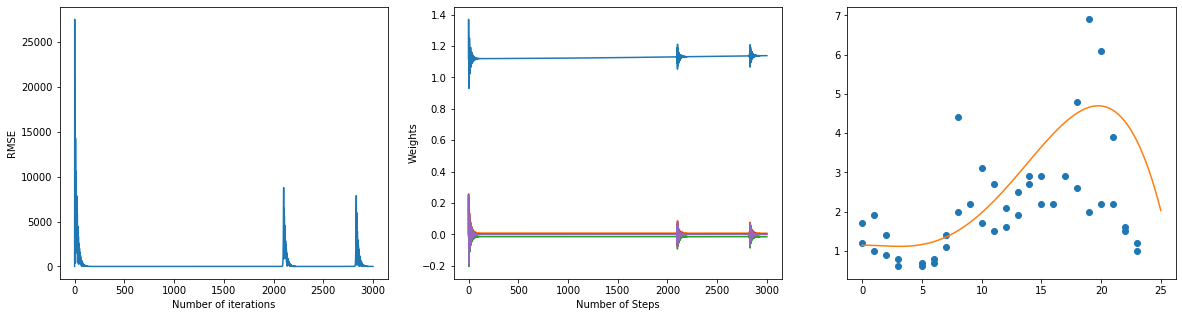

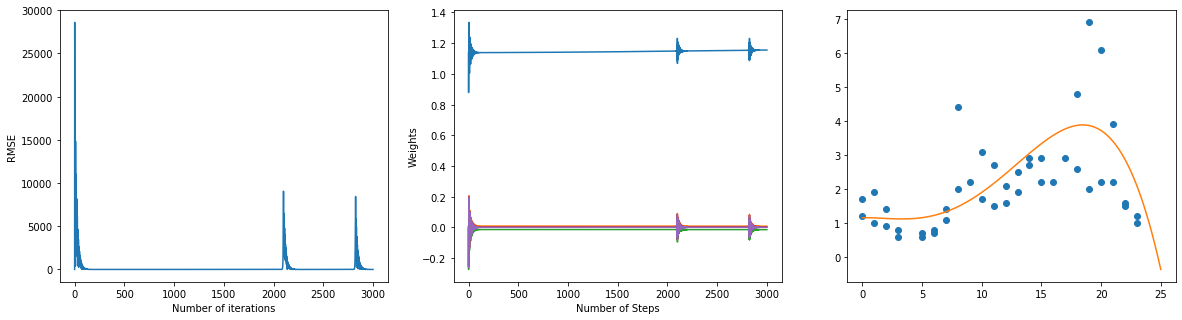

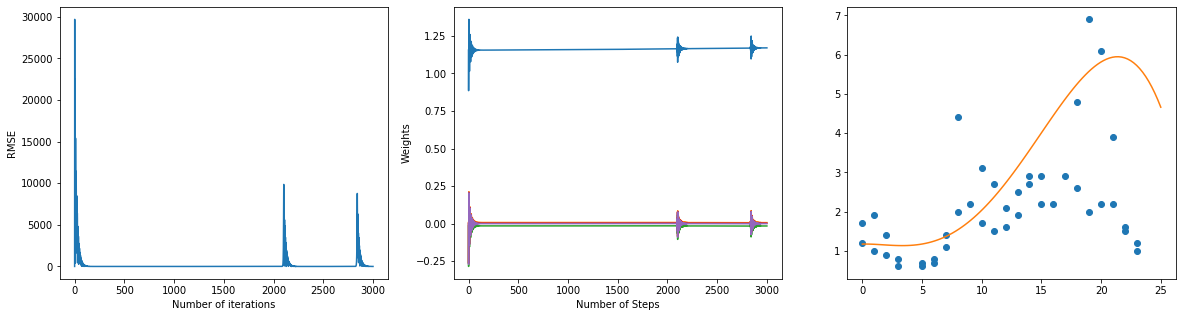

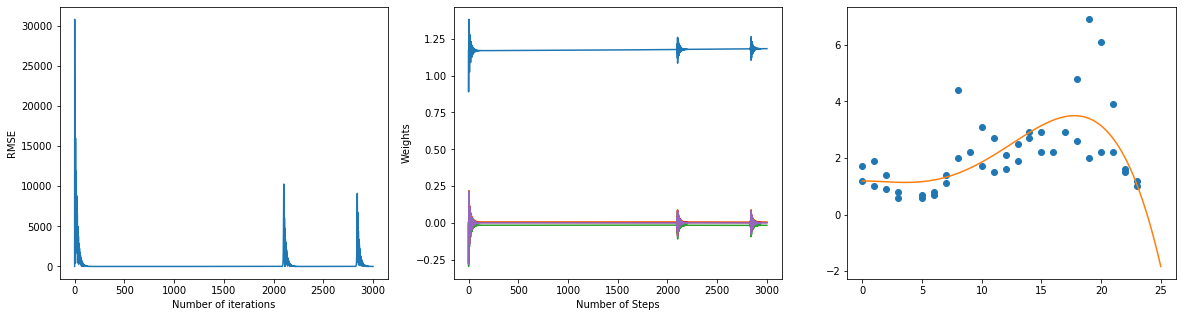

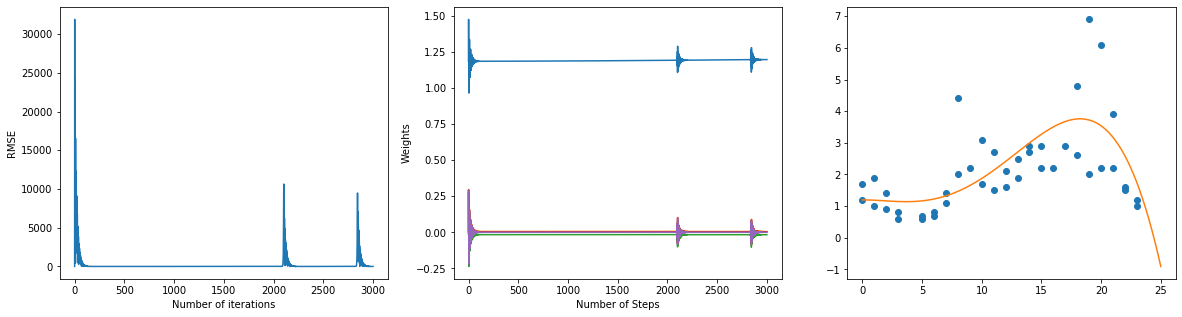

In [68]:
W = np.zeros((5, 1))
n_steps = 3000
for rho in drange2(1e-1, 3e-1, 1e-2):
    W, error_sequence, W_sequence = gradient_descent_adam(quartic_model, quartic_model_gradient, rmse, X, T, W, rho, n_steps)
    print(f'Final RMSE for rho {rho} at step {n_steps} is {np.sqrt(error_sequence[-1]):4f}')
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 3, 1)
    plt.plot(error_sequence)
    plt.ylabel("RMSE")
    plt.xlabel("Number of iterations");
    plt.subplot(1, 3, 2)
    plt.plot(W_sequence)
    plt.ylabel("Weights")
    plt.xlabel("Number of Steps");
    plt.subplot(1, 3, 3)
    plt.plot(X, T, 'o')
    xs = np.linspace(0, 25, 100).reshape(-1, 1)
    plt.plot(xs, quartic_model(xs, W));

After plotting the gradient descent adam function for the quartic model, for different learning rates, i.e. (for rho= 0.1 to 0.3), we can see that the minimum error is 1.019159, at rho= 0.21.
Therefore, the quartic function that best fits the given air quality data has a learning rate of 0.21 and an error of 1.019159.
As seen from the above plots, the error varies (increasing and deacreasing constantly) with respect to a constant increase in the learning rate (rho), however, no such trend is observed in the biases, as they need to be kept in balance with each other to obtain the minimum error at that point.

# Extra Credit

In [69]:
def sineaffine_model(X, W):
    # W is column vector
    n_columns = X.shape[1]
    linear_part = X @ W[1:n_columns + 1, :] + W[0,:]
    nonlinear_part = np.sin(X) @ W[n_columns + 1:n_columns + 2, :]
    return nonlinear_part + linear_part

In [70]:
def dYdW(X, T, W):
    # One row per sample in X,T.  One column per W component.
    # For first one, is constant 1.
    # For second one, is value of X
    linear_part = np.insert(X, 0, 1, axis=1)
    nonlinear_part = np.cos(X)
    return np.hstack((linear_part, nonlinear_part))

def dEdY(X, T, W):
    Y = sineaffine_model(X, W)
    return -2 * (T - Y)
    
def sineaffine_model_gradient(X, T, W):
    result = dEdY(X, T, W).T @ dYdW(X, T, W) / (X.shape[0])
    return result.T

In [74]:
w_bias = 0.5 # 10
w = 0.5
nonlinear_w = 0.1
W = np.array([w_bias, w, nonlinear_w]).reshape(-1, 1)
rho = 0.001
nSteps = 400
#for rho in drange2(0.01, 0.05, 0.01):
W, error_sequence, W_sequence = gradient_descent_adam(sineaffine_model, sineaffine_model_gradient, rmse, X, T, W, rho, nSteps)
print('Adam:  Error is {:.2f}   W is {:.2f}, {:.2f} {:.2f}'.format(rmse(sineaffine_model, X, T, W), W[0,0], W[1,0], W[2,0]))

Adam:  Error is 1.60   W is 0.23, 0.22 0.47


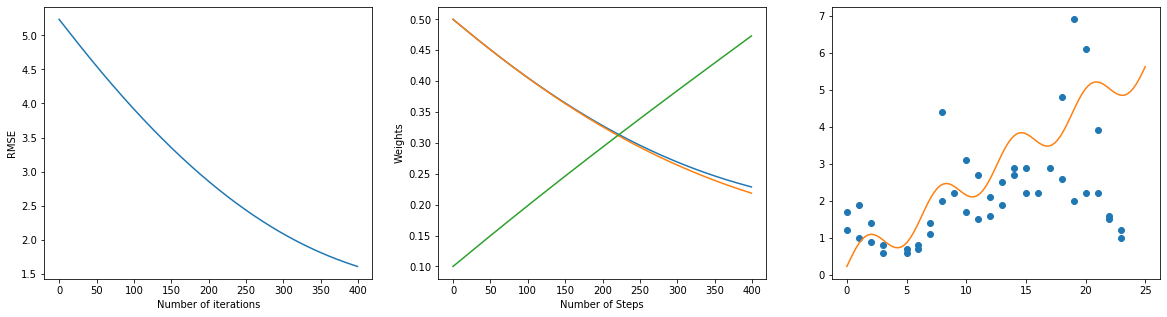

In [75]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.plot(error_sequence)
plt.ylabel("RMSE")
plt.xlabel("Number of iterations");
plt.subplot(1, 3, 2)
plt.plot(W_sequence)
plt.ylabel("Weights")
plt.xlabel("Number of Steps");
plt.subplot(1, 3, 3)
plt.plot(X, T, 'o')
xs = np.linspace(0, 25, 100).reshape(-1, 1)
plt.plot(xs, sineaffine_model(xs, W));

Adam:  Error is 1.60   W is 0.23, 0.22 0.47
Adam:  Error is 1.28   W is 0.59, 0.12 1.24
Adam:  Error is 1.78   W is 0.53, 0.12 2.46
Adam:  Error is 2.75   W is 0.12, 0.14 4.11
Adam:  Error is 4.08   W is -0.38, 0.16 6.18
Adam:  Error is 5.74   W is -0.98, 0.19 8.66
Adam:  Error is 7.70   W is -1.68, 0.23 11.56


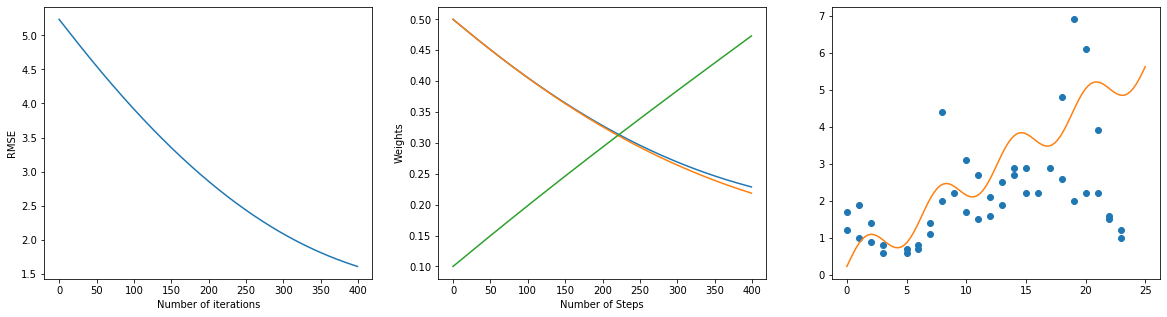

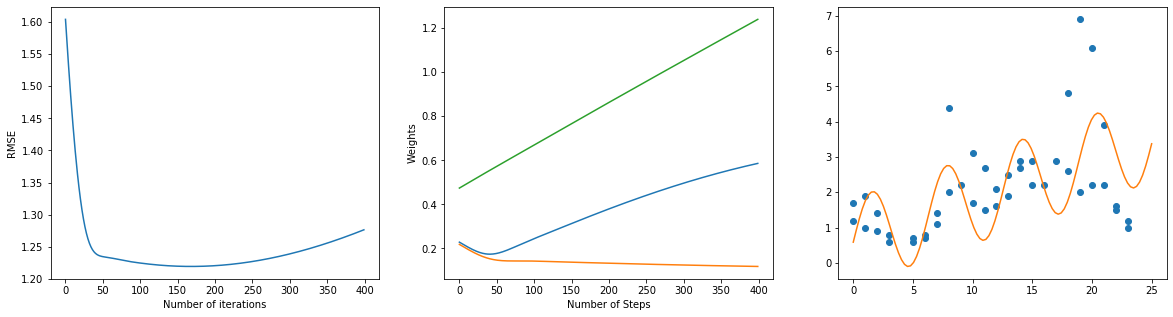

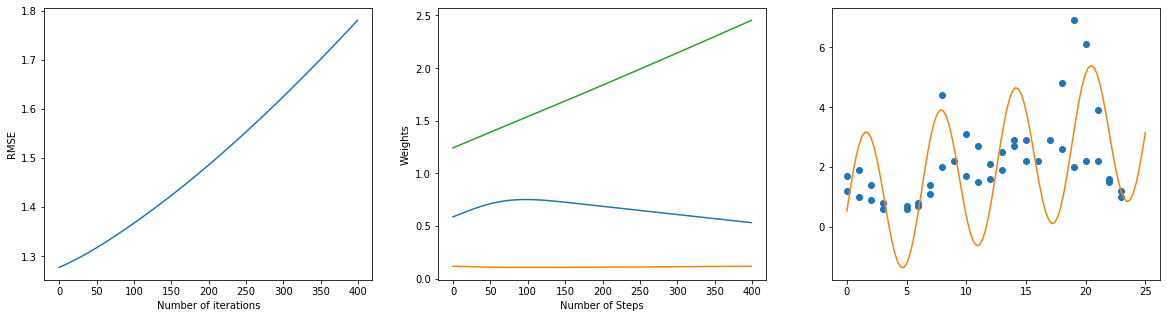

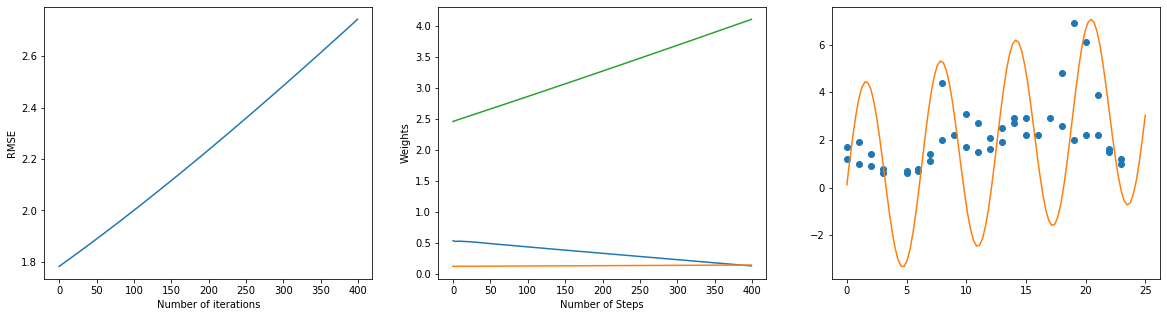

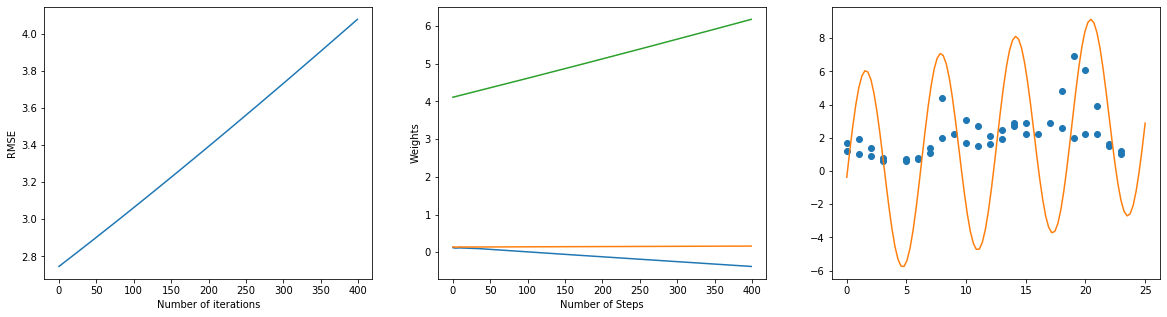

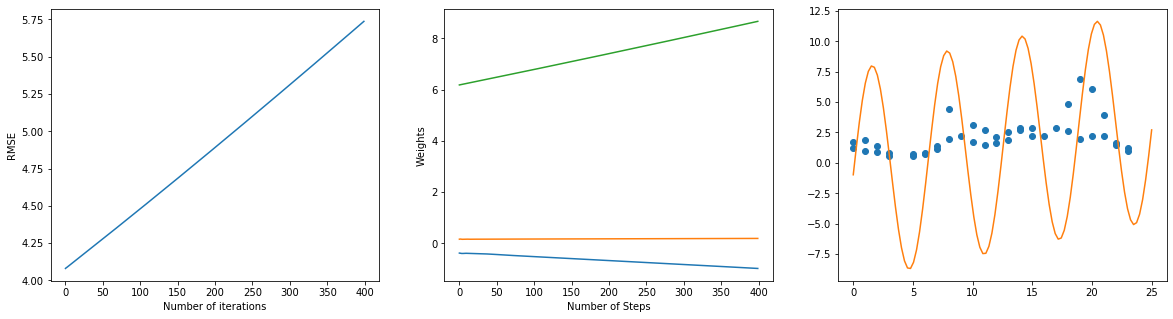

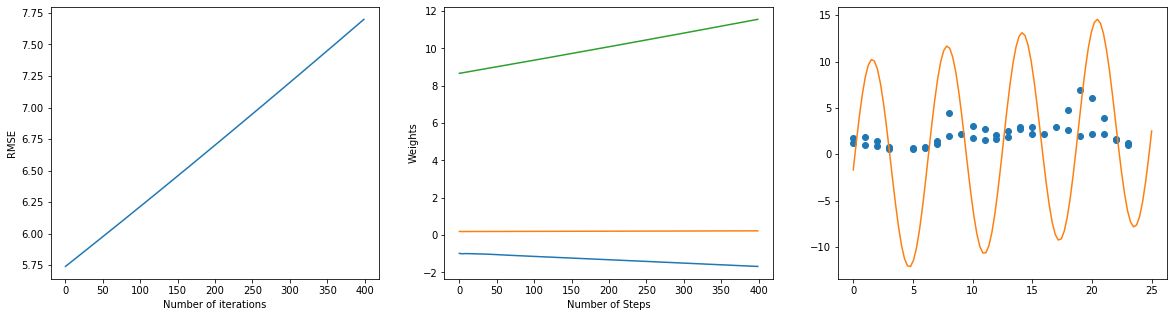

In [81]:
w_bias = 0.5 # 10
w = 0.5
nonlinear_w = 0.1
W = np.array([w_bias, w, nonlinear_w]).reshape(-1, 1)
#rho = 0.01
nSteps = 400
for rho in drange2(0.001, 0.007, 0.001):
    W, error_sequence, W_sequence = gradient_descent_adam(sineaffine_model, sineaffine_model_gradient, rmse, X, T, W, rho, nSteps)
    print('Adam:  Error is {:.2f}   W is {:.2f}, {:.2f} {:.2f}'.format(rmse(sineaffine_model, X, T, W), W[0,0], W[1,0], W[2,0]))
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 3, 1)
    plt.plot(error_sequence)
    plt.ylabel("RMSE")
    plt.xlabel("Number of iterations");
    plt.subplot(1, 3, 2)
    plt.plot(W_sequence)
    plt.ylabel("Weights")
    plt.xlabel("Number of Steps");
    plt.subplot(1, 3, 3)
    plt.plot(X, T, 'o')
    xs = np.linspace(0, 25, 100).reshape(-1, 1)
    plt.plot(xs, sineaffine_model(xs, W));

After plotting the gradient descent adam function for the sineaffine model, for different learning rates, i.e. (for rho= 0.001 to 0.007), we can see that the minimum error is 1.28, at rho= 0.002.
Therefore, the sineaffine function that best fits the given air quality data has a learning rate of 0.002 and an error of 1.28.
As seen from the above plots,the function is a sine wave, superimposed on the air quality data. After experimenting with different ranges for rho, the error goes on increasing, with the increase or decreasing rho too much, therefore this is the best range of the learning rates for the sine affine model.

The Quadratic function, when run seperately gives the correct answer. The testing has been performed in a different notebook for the quadratic model, where it returns the correct value. However, when included in the main assignment, it is not returning the correct value. When the script was run initially, it returned the correct values without any issue. The kernel may not be accepting the correct input values for the quadratic function. The notebook containing the quadratic model, is attached with this assignment, please check it from there if possible. 

## Grading

Your notebook will be run and graded automatically. Test this grading process by first downloading [A1grader.zip](http://www.cs.colostate.edu/~anderson/cs545/notebooks/A1grader.zip) and extract `A1grader.py` from it. Run the code in the following cell to demonstrate an example grading session. You should see a perfect execution score of 80/80 if your functions are defined correctly. The remaining 20 points will be based on other testing and the results you obtain and your discussions. 

A different, but similar, grading script will be used to grade your checked-in notebook. It will include additional tests. You should design and perform additional tests on all of your functions to be sure they run correctly before checking in your notebook.  

For the grading script to run correctly, you must first name this notebook as 'Lastname-A1.ipynb' with 'Lastname' being your last name, and then save this notebook.

In [35]:
%run -i A1grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'GowaikarFinal-A1.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing
  X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
  W = np.array([1, 2]).reshape(-1, 1)
  Y = linear_model(X, W)

--- 10/10 points. Returned correct values.

Testing
  X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
  W = np.array([1, 2, -3]).reshape(-1, 1)
  Y = quadratic_model(X, W)

--- 10/10 points. Returned correct values.

Testing
  X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
  W = np.array([1, 2, -3, 1.5).reshape(-1, 1)
  Y = cubic_model(X, W)

--- 10/10 points. Returned correct values.

Testing
  X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
  W = np.array([1, 2, -3, 1.5, 0.3]).reshape(-1, 1)
  Y = quartic_model(X, W)

--- 10/10 points. Returned correct values.

Testing
  X = np.array([

## Check-In

Do not include this section in your notebook.

Name your notebook ```Lastname-A1.ipynb```.  So, for me it would be ```Anderson-A1.ipynb```.  Submit the file using the ```Assignment 1``` link on [Canvas](https://colostate.instructure.com/courses/86986).

Grading will be based on 

  * correct behavior of the required functions listed above,
  * easy to understand plots in your notebook,
  * readability of the notebook,
  * effort in making interesting observations, and in formatting your notebook.

## Extra Credit (1 point)

Write functions for a model and its gradient that is a linear (affine) function plus a sine function.  Repeat the above experiments with the air quality data using your new model. Include plots and explanations.